# Business Understanding

## Background and Context

Breast cancer is one of the most common forms of cancer among women worldwide, and early detection plays a critical role in improving treatment outcomes and survival rates. In clinical practice, fine needle aspirate (FNA) biopsies are commonly used as a minimally invasive method to collect cell samples from breast masses. These samples are examined under a microscope to assess whether the tumor is benign or malignant.

The Wisconsin Breast Cancer Diagnostic dataset contains quantitative features extracted from digitized images of FNA samples. Rather than using raw medical images, the dataset provides numerical measurements that describe the size, shape, and texture of cell nuclei, which are known to differ significantly between benign and malignant tumors. Each observation is labeled as either malignant or benign, making the dataset suitable for a binary classification task.

For each of the ten nucleus characteristics, three summary statistics are provided: the mean value, the standard error, and the worst (largest) value observed. This results in a total of 30 numerical predictors for each sample. These features aim to capture not only the average behavior of cell nuclei, but also their variability and extreme abnormalities, which are clinically relevant indicators of cancer.

## Business Objective

The primary objective of this project is to develop a predictive model that can accurately distinguish between malignant and benign breast tumors based on cell nucleus characteristics. Such a model could potentially assist medical professionals by providing an additional, data-driven tool to support diagnostic decision-making.

Given the medical context, particular emphasis is placed on correctly identifying malignant cases, as failing to detect cancer at an early stage may have serious consequences for patients. Therefore, the model should aim to minimize the number of malignant tumors that are incorrectly classified as benign.

## Data Science Objective

From a data science perspective, the objective is to build, evaluate, and compare multiple interpretable classification models using resampling techniques such as cross-validation. The focus is on assessing how well different models perform in terms of generalization, robustness, and their ability to correctly identify malignant cases.

The analysis will emphasize models commonly discussed in statistical learning literature, such as logistic regression, linear discriminant analysis (LDA), quadratic discriminant analysis (QDA), and k-nearest neighbors (KNN). Cross-validation will be used to obtain reliable performance estimates and to reduce the risk of overfitting.

## Success Criteria

The project will be considered successful if the following criteria are met:
- High recall (sensitivity) for malignant cases, ensuring that the majority of cancerous tumors are correctly identified.
- Reasonable overall accuracy, indicating balanced performance across both classes.
- Stable cross-validated performance, demonstrating that the selected model generalizes well to unseen data and is not overly dependent on a specific train-test split.

## Scope and Constraints
This analysis is restricted to the variables provided in the Wisconsin Breast Cancer Diagnostic dataset. No external clinical information, such as patient demographics, genetic data, or medical history, is incorporated into the modeling process. As a result, the conclusions of this study are limited to patterns present within the extracted cell nucleus features.

Additionally, the dataset represents measurements derived from digitized images rather than direct clinical diagnoses. Therefore, the models developed in this project are intended for analytical and educational purposes only and should not be interpreted as standalone diagnostic tools. The primary analytical focus is on reducing classification errors, with particular emphasis on minimizing false negative predictions for malignant cases due to their clinical significance.

## Analytical Approach
This project follows the CRISP-DM framework, beginning with business understanding and data understanding, followed by data preparation, modeling, and evaluation. During the modeling phase, several classification techniques will be implemented and compared, including Logistic Regression, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and K-Nearest Neighbors (KNN).

Resampling techniques, specifically cross-validation, will be employed to assess model performance and ensure reliable generalization to unseen data. Model evaluation will focus on metrics relevant to medical classification tasks, such as recall (sensitivity), overall accuracy, and stability across validation folds. The final results will be interpreted in the context of both statistical performance and clinical relevance.

### Import required libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

# Model Selection and resampling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn.metrics import (
     confusion_matrix,
     classification_report,
     accuracy_score,
     recall_score,
     roc_auc_score,
     roc_curve
)

# Pipeline
from sklearn.pipeline import Pipeline

## Data Understanding

### Data Collection

The dataset used in this project was obtained from Kaggle and originates from the Wisconsin Breast Cancer Diagnostic (WDBC) dataset, which was developed at the University of Wisconsin–Madison. The dataset is also publicly available through the UCI Machine Learning Repository and has been widely used in medical and machine learning research.

The data were originally collected from digitized images of fine needle aspirate (FNA) biopsies of breast masses. From these images, quantitative features describing the characteristics of cell nuclei were extracted using image analysis techniques. The Kaggle version of the dataset provides these processed numerical features in a structured tabular format, making it suitable for statistical learning and classification tasks.

Each row in the dataset corresponds to one breast mass sample, summarized by measurements of multiple cell nuclei, and is associated with a diagnostic label indicating whether the tumor is malignant or benign.

In [3]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

The dataset consists of 569 observations and 33 columns, including one identifier column, one diagnostic target variable, and 30 numerical predictor variables. The data are structured and complete, with no missing values, which makes the dataset suitable for statistical modeling and comparative analysis.

Although the sample size is sufficient for classical classification methods such as logistic regression, LDA, and QDA, it remains modest relative to the complexity and variability of real-world medical populations. As the data originate from a single source and represent a limited set of samples, the results of this analysis should be interpreted with appropriate caution regarding generalizability to broader clinical settings.

### Target Variable
#### Diagnosis (Categorical)

The target variable in this analysis is diagnosis, a categorical variable indicating whether a breast mass is benign (B) or malignant (M). A malignant diagnosis corresponds to the presence of cancerous cells, while a benign diagnosis indicates a non-cancerous breast mass.

This variable defines a binary classification problem, where the primary goal is to correctly identify malignant cases. In a medical context, misclassifying a malignant tumor as benign (false negative) can have serious consequences, as it may delay further clinical evaluation or treatment. Therefore, particular attention is given to model performance with respect to the malignant class.

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Predictor Variables

The predictor variables in this dataset consist of quantitative measurements extracted from digitized images of fine needle aspirate (FNA) biopsies of breast masses. These measurements describe the morphology and texture of cell nuclei, which are critical indicators in distinguishing benign from malignant tumors in histopathological analysis.

For each breast mass, measurements are obtained from multiple cell nuclei present in the sample. From these measurements, ten fundamental nucleus characteristics are computed. To summarize both typical behavior and abnormal variations among nuclei, three statistical descriptors are calculated for each characteristic: the mean, the standard error, and the worst (largest) value. This results in a total of 30 numerical predictor variables.

### Fundamental Nucleus Characteristics

The ten core characteristics measured for each cell nucleus are described below:
1. Radius:
Represents the mean distance from the center of the nucleus to points on its perimeter. Malignant cells often exhibit enlarged nuclei due to    abnormal cell growth.
2. Texture:
Measures the variation in gray-scale intensity within the nucleus. Higher texture values indicate greater internal heterogeneity, which is commonly observed in malignant cells.
3. Perimeter:
Represents the total length of the nucleus boundary. Irregular and elongated boundaries tend to increase perimeter measurements in malignant nuclei.
4. Area:
Measures the total area enclosed by the nucleus boundary. Malignant tumors typically contain nuclei with larger areas compared to benign cells.
5. Smoothness:
Quantifies local variations in the radius of the nucleus. Lower smoothness indicates irregular or jagged boundaries, which are characteristic of cancerous cells.
6. Compactness:
Defined as perimeter^2/area - 1, this feature measures how closely the nucleus resembles a circular shape. Higher compactness values indicate irregular nuclear shapes.
7. Concavity:
Measures the severity of inward indentations in the nucleus boundary. Malignant nuclei often display pronounced concave regions.
8. Concave Points:
Counts the number of concave portions of the nucleus contour. A higher number of concave points reflects greater structural distortion.
9. Symmetry:
Assesses how symmetrical the nucleus is across its axes. Benign nuclei tend to be more symmetric, while malignant nuclei are often asymmetrical.
10. Fractal Dimension:
Measures the complexity of the nucleus boundary. Higher fractal dimension values indicate more complex and irregular contours, which are associated with malignancy.

### Statistical Descriptors of Nucleus Characteristics
For each of the ten characteristics described above, three statistical summaries are provided:
1. Mean Features (*_mean):
The mean features represent the average value of each nucleus characteristic across all measured nuclei within a breast mass. These variables capture the overall or typical nuclear morphology of the tumor.

Examples include:

- radius_mean
- texture_mean
- perimeter_mean
- area_mean

Clinically, these features describe the general structural differences between benign and malignant tumors, as malignant tumors often exhibit larger and more irregular nuclei on average.

2. Standard Error Features (*_se):
The standard error (SE) features quantify the variability of each nucleus characteristic across the sampled nuclei. These variables reflect the degree of heterogeneity within a tumor.

Examples include:
- radius_se
- texture_se
- perimeter_se
- area_se

In a medical context, increased variability in nuclear morphology is an important indicator of malignancy, as cancerous tumors often consist of cells with diverse and abnormal characteristics.

3. Worst Features (*_worst):
The worst features correspond to the mean of the three largest observed values for each nucleus characteristic. These variables are designed to capture the most extreme nuclear abnormalities present in the sample.

Examples include:
- radius_worst
- texture_worst
- perimeter_worst
- area_worst

These features are particularly important in cancer diagnosis, as malignant behavior may be driven by a small subset of highly abnormal cells rather than the average behavior of all nuclei.


### Additional Variables

These features are particularly important in cancer diagnosis, as malignant behavior may be driven by a small subset of highly abnormal cells rather than the average behavior of all nuclei.

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

columns or features whose data type is stored as object are categorical, therefore there is only 1 categorical feature in this dataset(diagnosis).

### Statistical Summary

#### Numeric Variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


The numeric predictors can be grouped into three categories: mean values, standard errors, and worst values, each computed from ten core tumor characteristics.

Size-related features such as radius, perimeter, and area show substantial variability and wide ranges, suggesting the presence of both small benign tumors and large malignant ones. Worst-case measurements exhibit particularly large maxima, highlighting localized aggressive tumor regions that may be more clinically relevant than average values.

Shape-related features, including compactness, concavity, and concave points, demonstrate high variability and extreme values, consistent with known morphological irregularities in malignant tumors.

Standard error features capture intra-tumor heterogeneity and show large dispersion for some observations, indicating chaotic growth patterns often associated with malignancy.

#### Categorical Variables

In [8]:
df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The target variable diagnosis contains two classes: benign (B) and malignant (M). Out of 569 observations, 357 cases (approximately 62.7%) are benign, while 212 cases (approximately 37.3%) are malignant. This indicates a mildly imbalanced class distribution, with benign cases representing the majority class.

Although the dataset contains a sufficient number of malignant samples for training classical classification models, the imbalance highlights the importance of using appropriate evaluation metrics. In particular, relying solely on overall accuracy may lead to misleading conclusions, as a model biased toward predicting the majority class could achieve high accuracy while failing to correctly identify malignant cases. Therefore, special attention will be given to recall (sensitivity) for the malignant class and to confusion matrix–based evaluation.

## EDA

### Data Quality Check

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

An inspection of missing values showed that the dataset does not contain null entries except for the column "Unnamed". This indicates that imputation will be required before modeling.

#### Check Outliers

To systematically identify extrem observations, the Interquartile Range(IQR) will be implemented. This method flags values that fall below 
Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

In [11]:
def iqr_outliers(df, column, remove=False):
    """
    Detects outliers in a given column using the IQR method.

    Parameters:
    - df (pd.DataFrame): Input dataframe
    - column (str): Column name to analyze
    - remove (bool): If true, returns dataframe without outliers.

    Returns:
    - outliers (pd.DataFrame): rows identified as outliers(if remove=False)
    - cleaned_df (pd.DataFrame): dataframe without outliers(if remove=True)    
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if remove:
        cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return cleaned_df
    
    return outliers

In [12]:
# Detect Outliers
outliers = iqr_outliers(df, 'radius_mean')
outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,NaN
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,NaN
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,NaN
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,NaN
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,NaN
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,NaN
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,NaN
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN


In [13]:
def outlier_summary_iqr(df, column):
    total_rows = len(df)
    
    outliers = iqr_outliers(df, column)
    num_of_outliers = len(outliers)
    percentage = (num_of_outliers/total_rows) * 100

    return {
        'Variable': column,
        'Number of Outliers': num_of_outliers,
        'Percentage of data': round(percentage, 2)
    }

In [14]:
numeric_df = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
numeric_vars = [numeric_var for numeric_var in numeric_df]

In [15]:
summary = [
    outlier_summary_iqr(numeric_df, col)
    for col in numeric_df.columns
]

outlier_summary_df = pd.DataFrame(summary)
outlier_summary_df

,Variable,Number of Outliers,Percentage of data
0,radius_mean,14,2.46
1,texture_mean,7,1.23
2,perimeter_mean,13,2.28
3,area_mean,25,4.39
4,smoothness_mean,6,1.05
5,compactness_mean,16,2.81
6,concavity_mean,18,3.16
7,concave points_mean,10,1.76
8,symmetry_mean,15,2.64
9,fractal_dimension_mean,15,2.64


#### Outlier Analysis

The IQR method was used to identify potential outliers in numeric predictors. In a medical context, those observations were not immediately removed, as extrem values may correspond to biologically meaningful cases such as highly aggressive or advanced tumors rather than measurement errors

#### Univariate Analysis

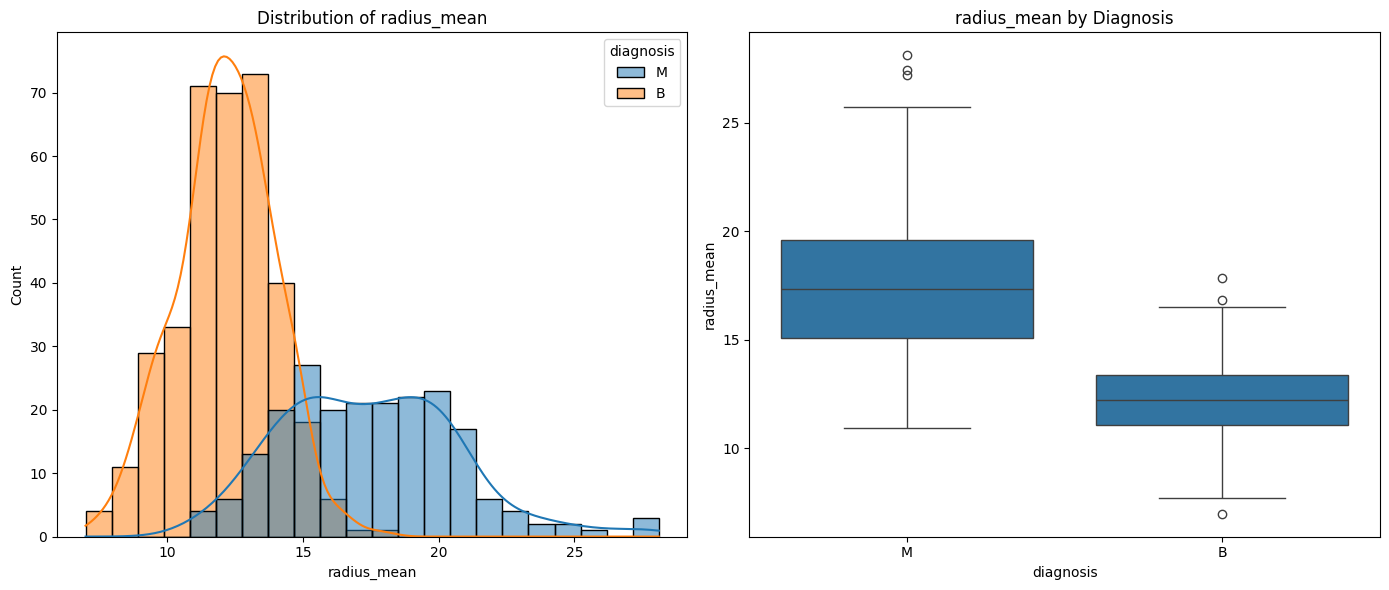

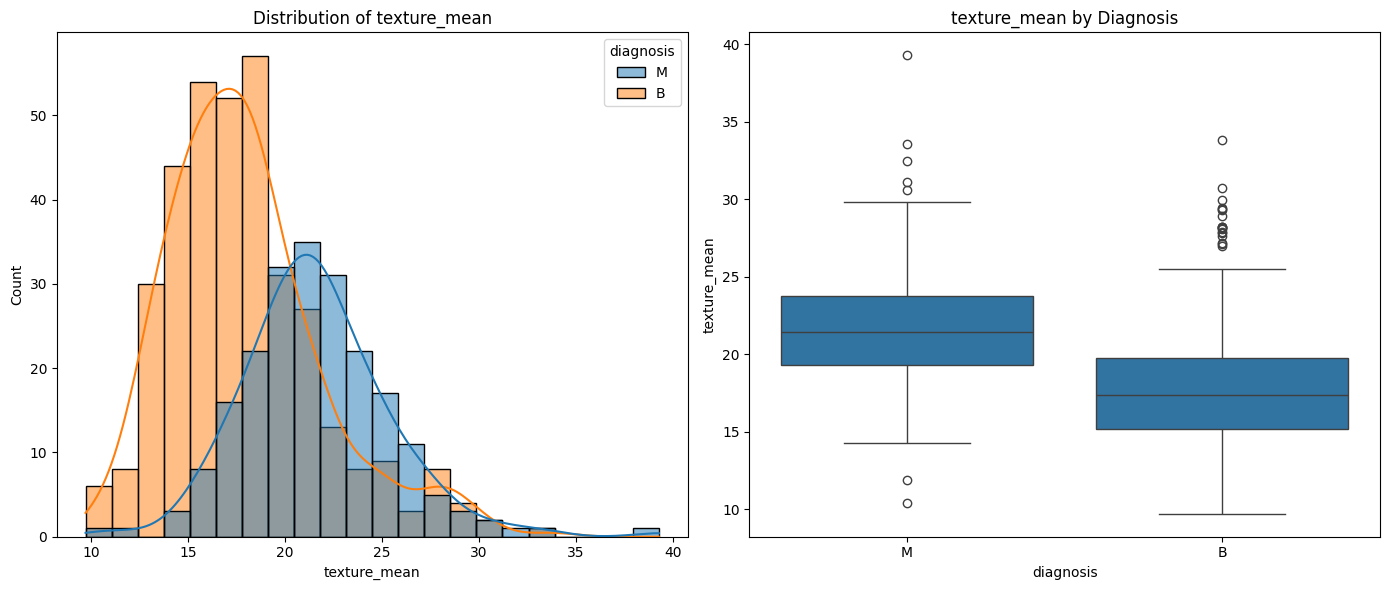

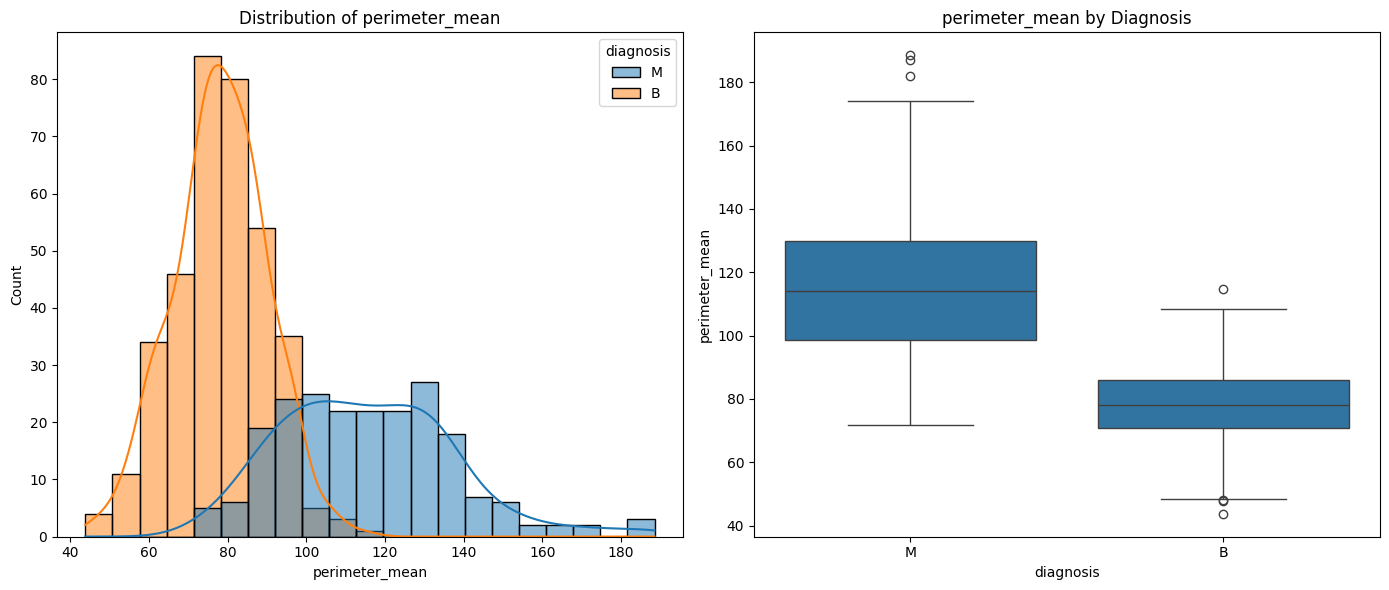

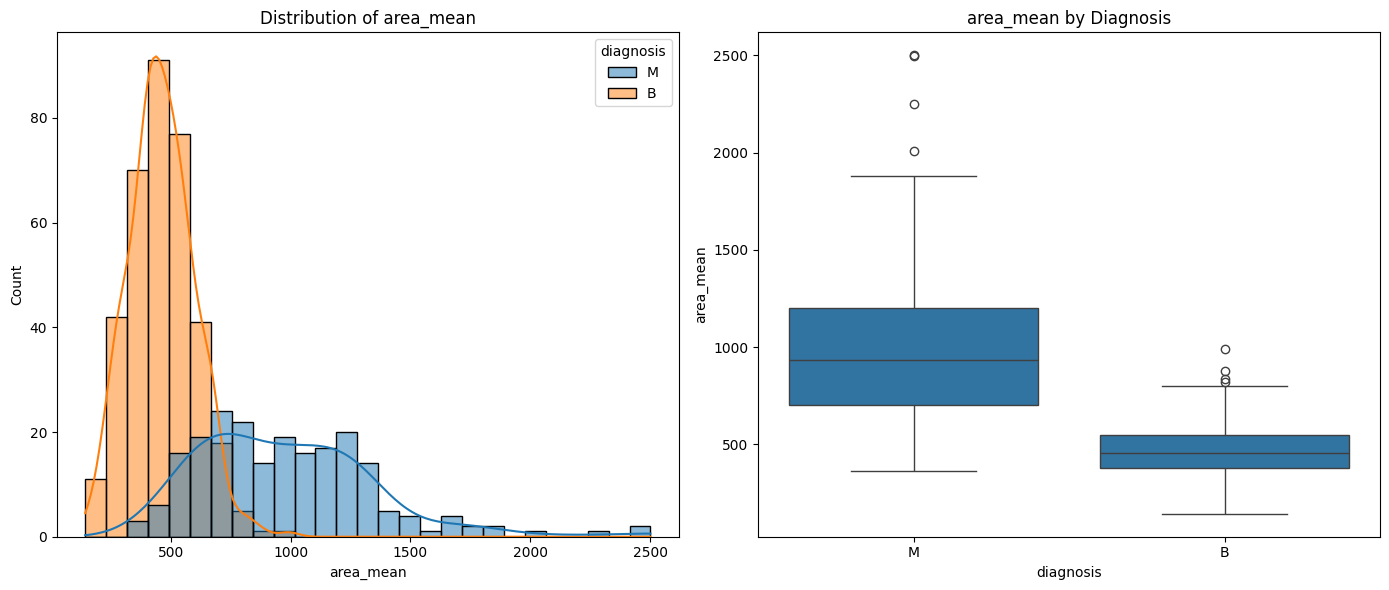

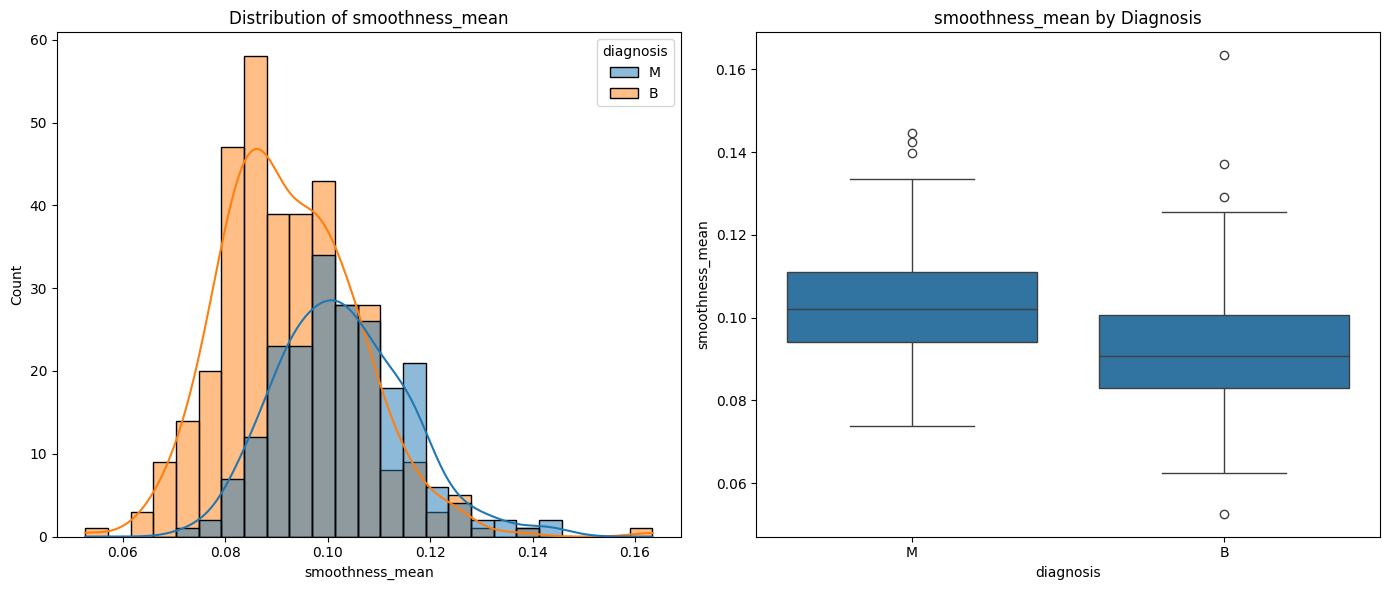

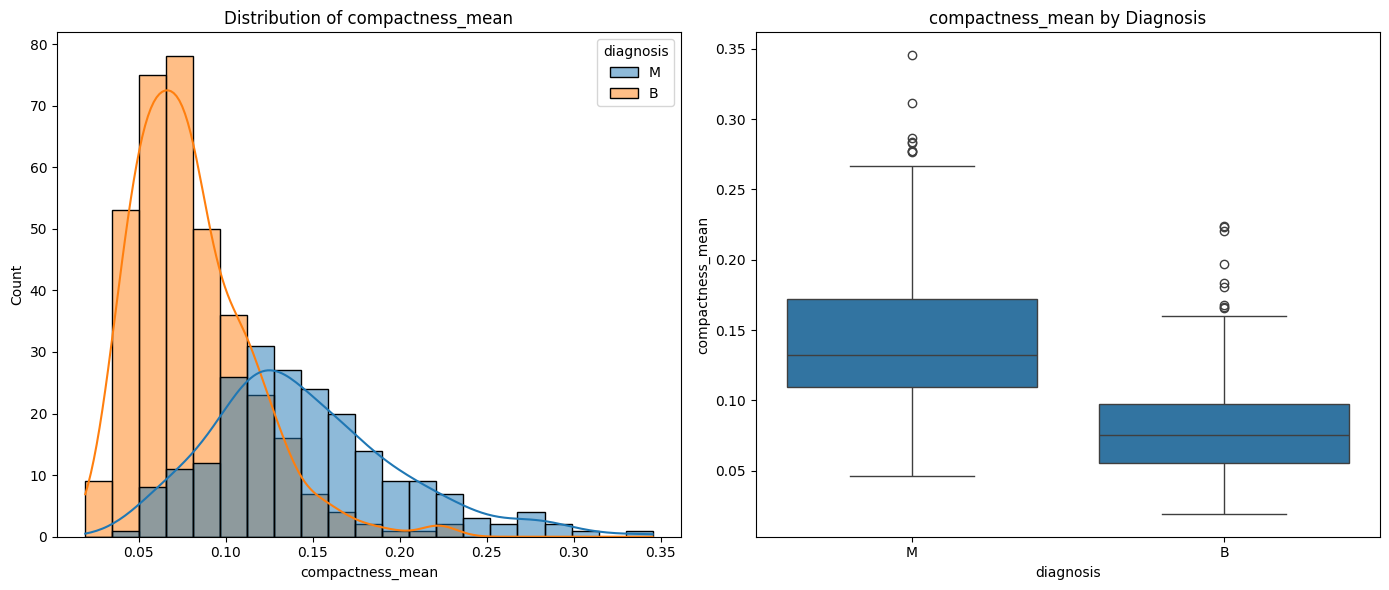

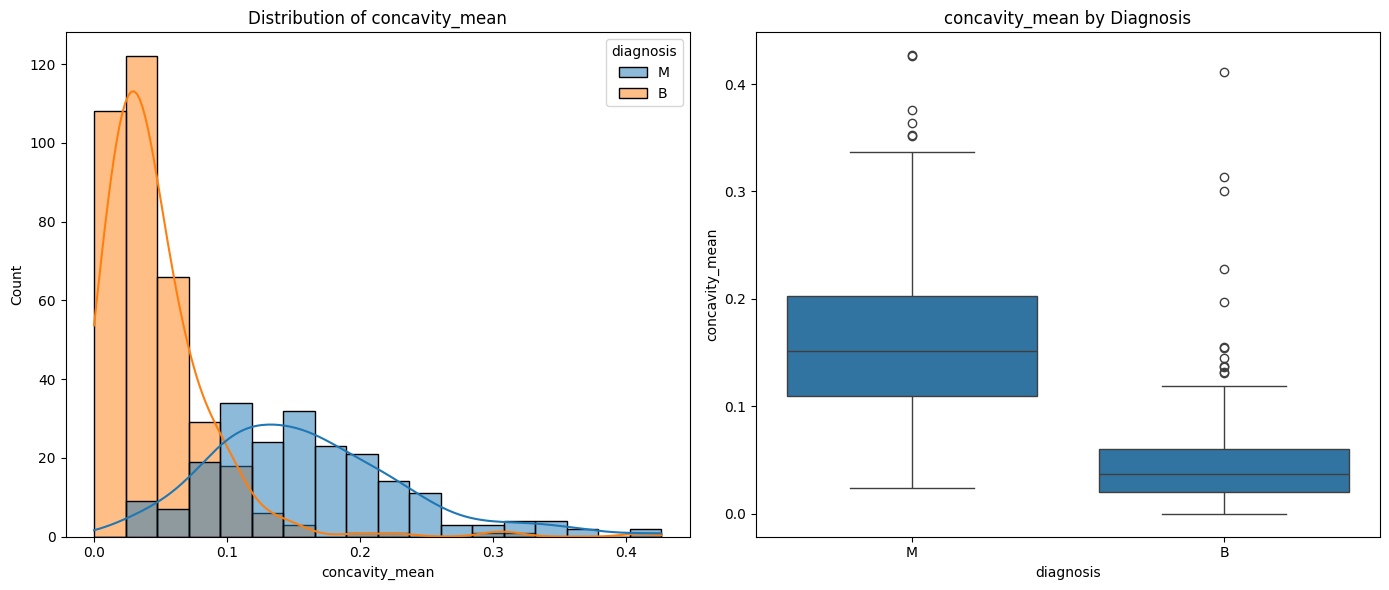

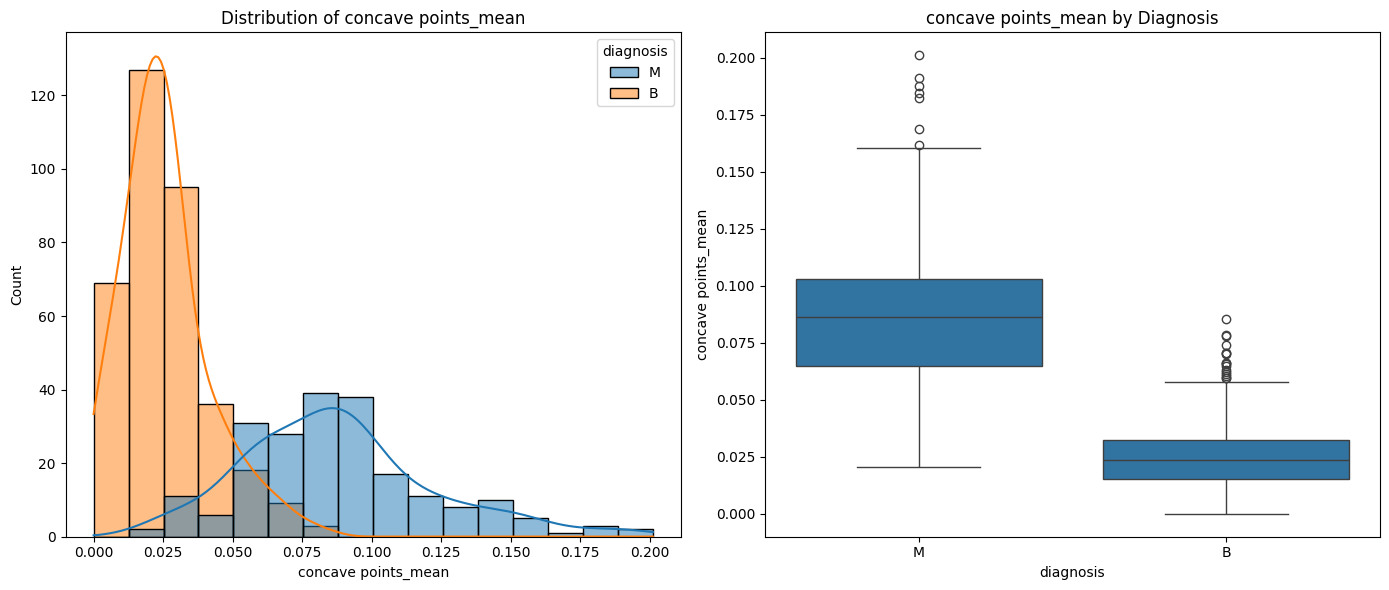

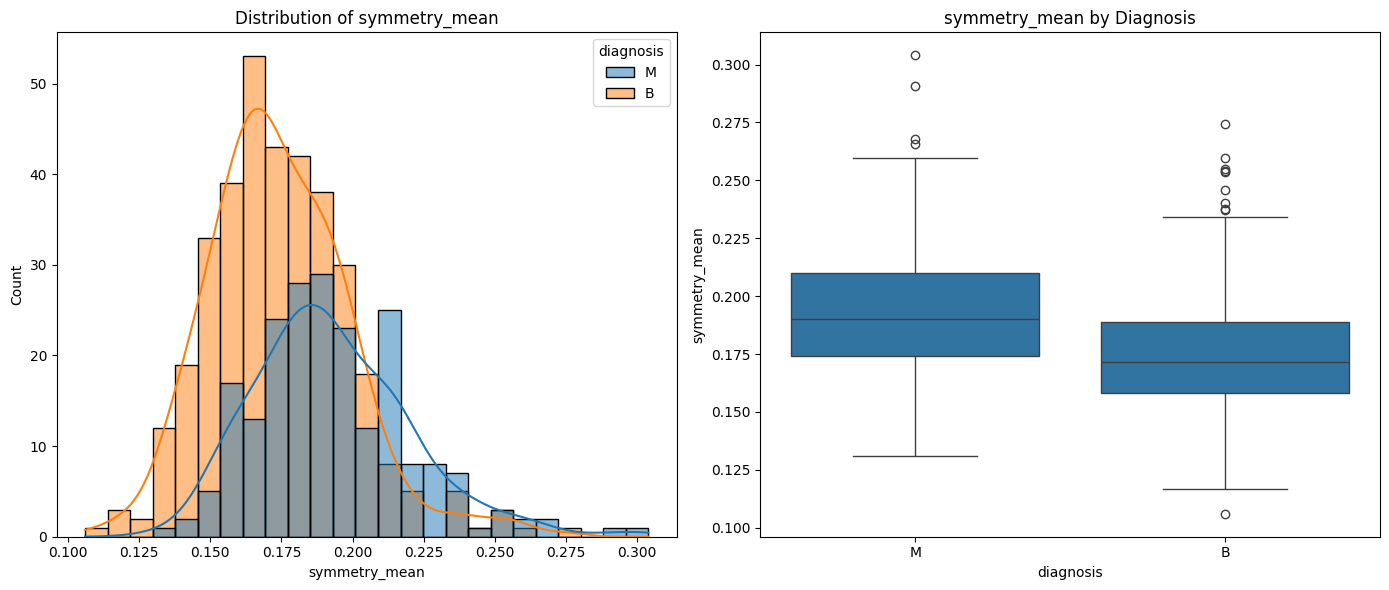

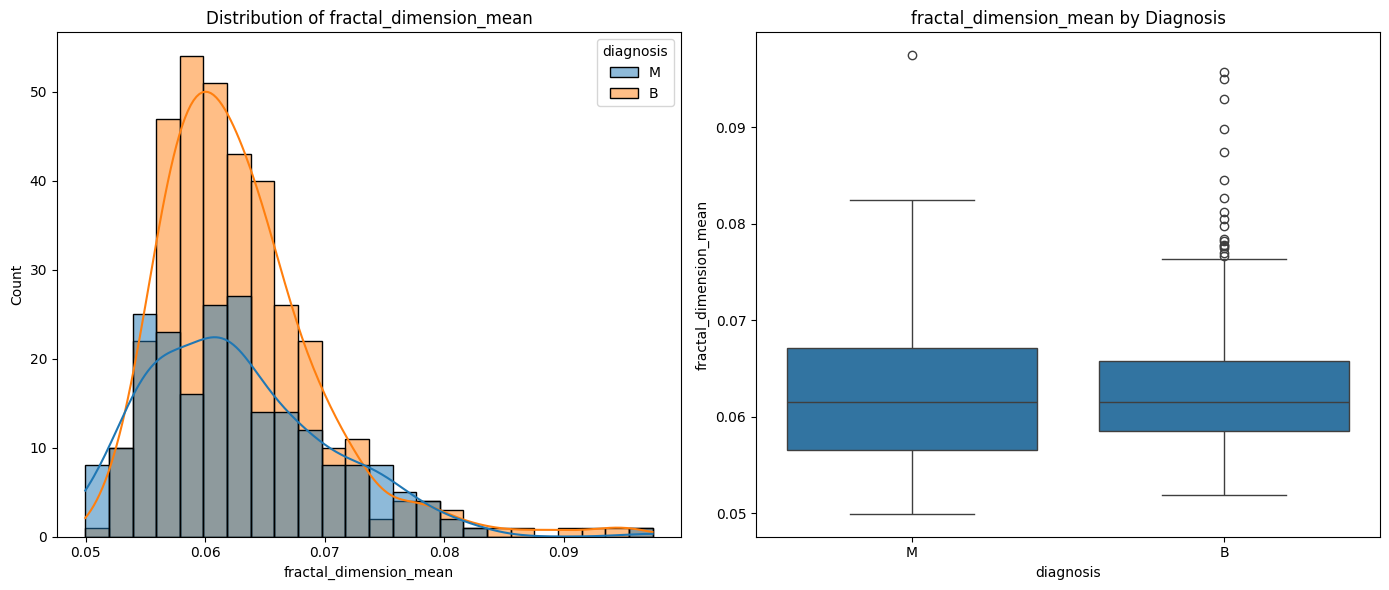

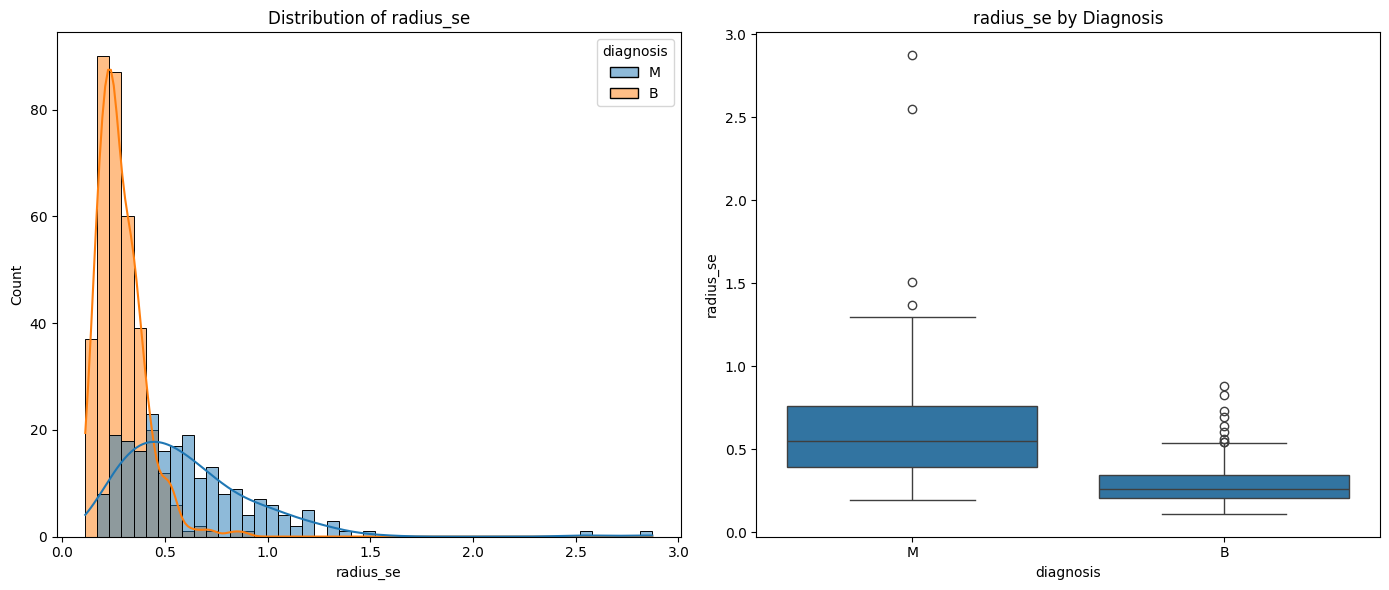

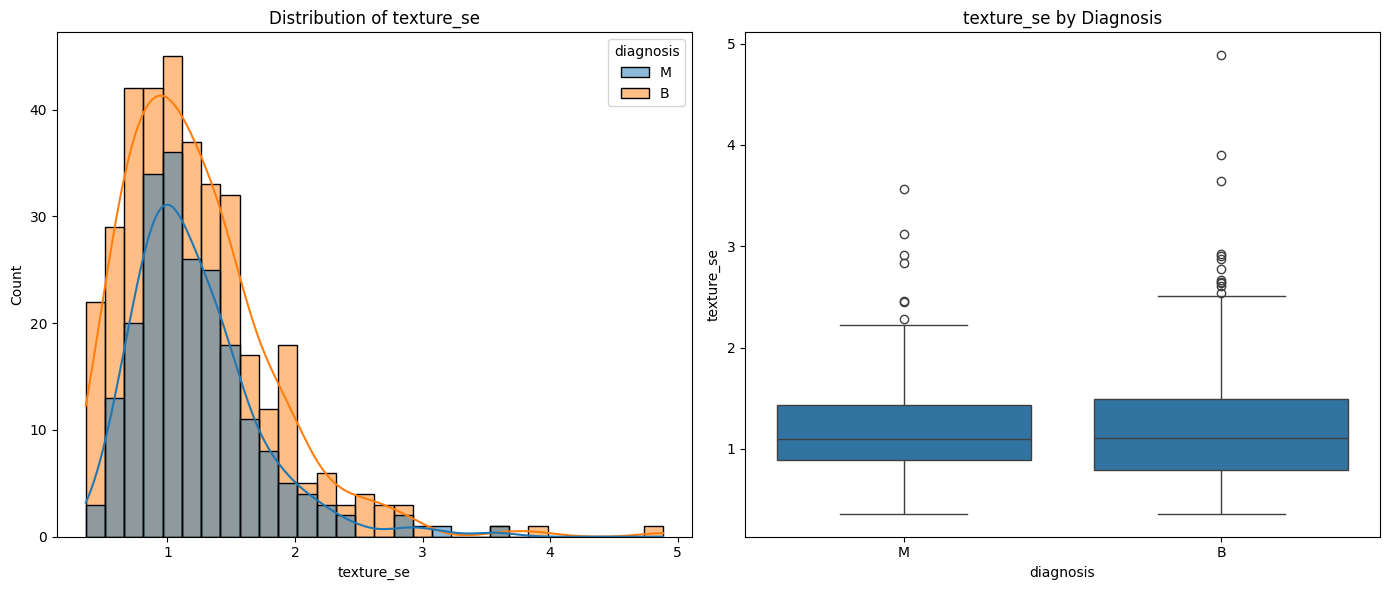

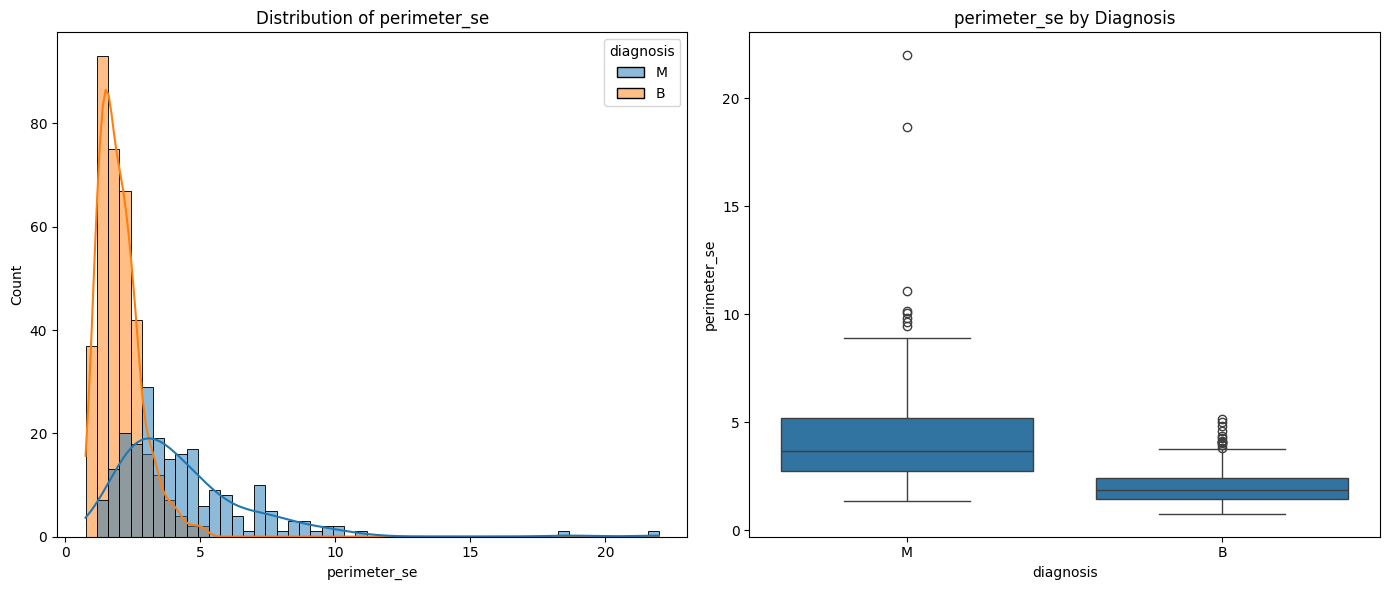

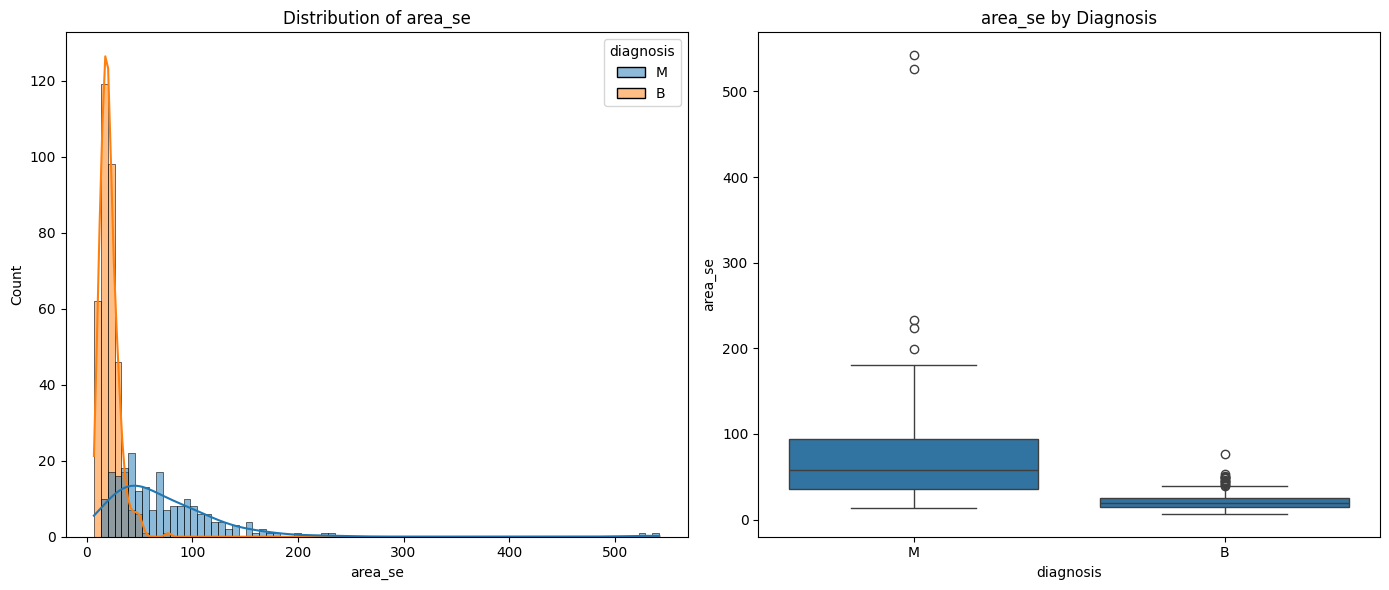

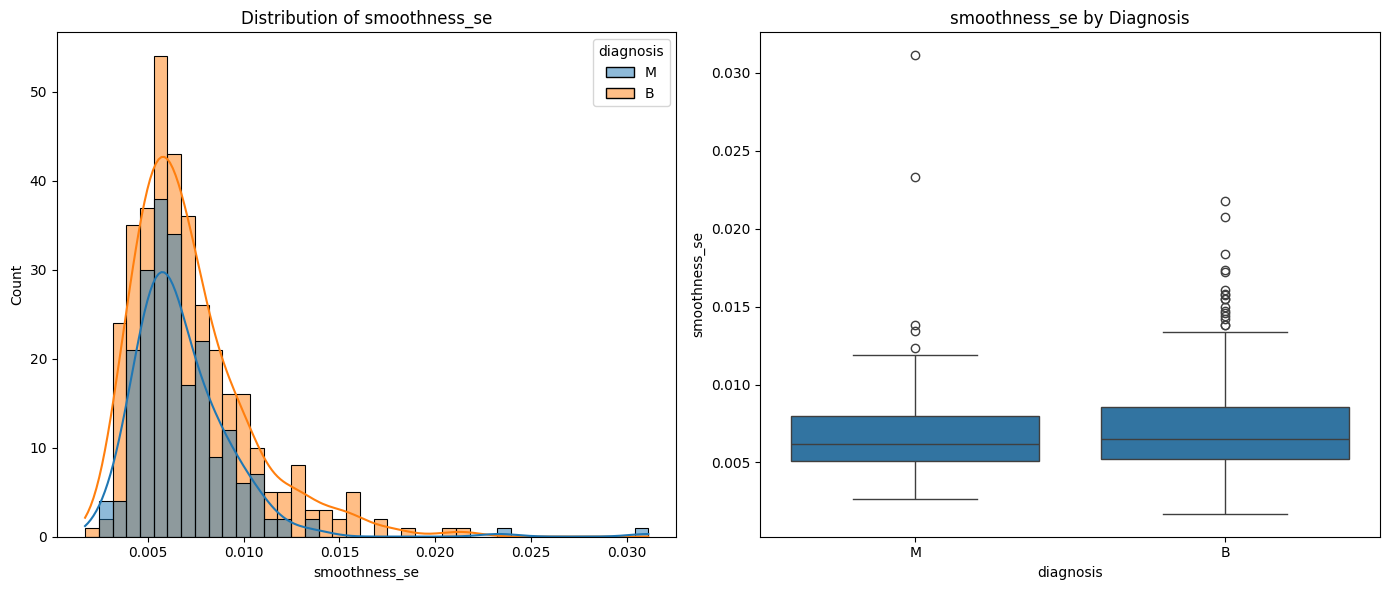

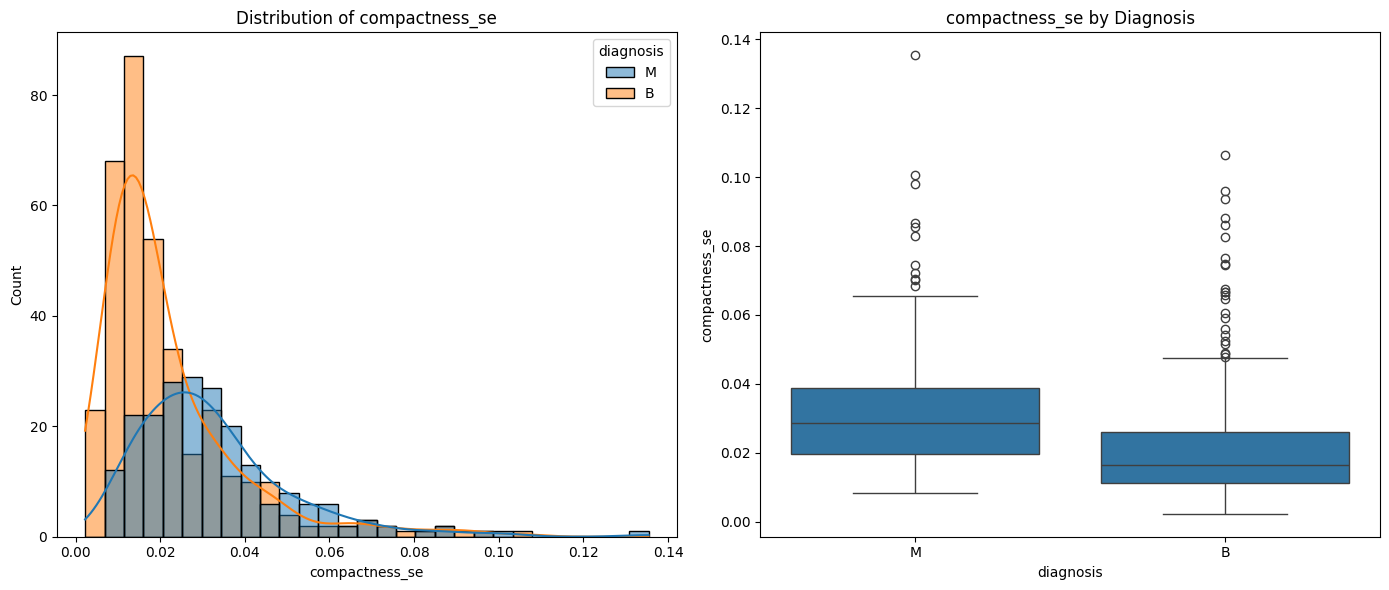

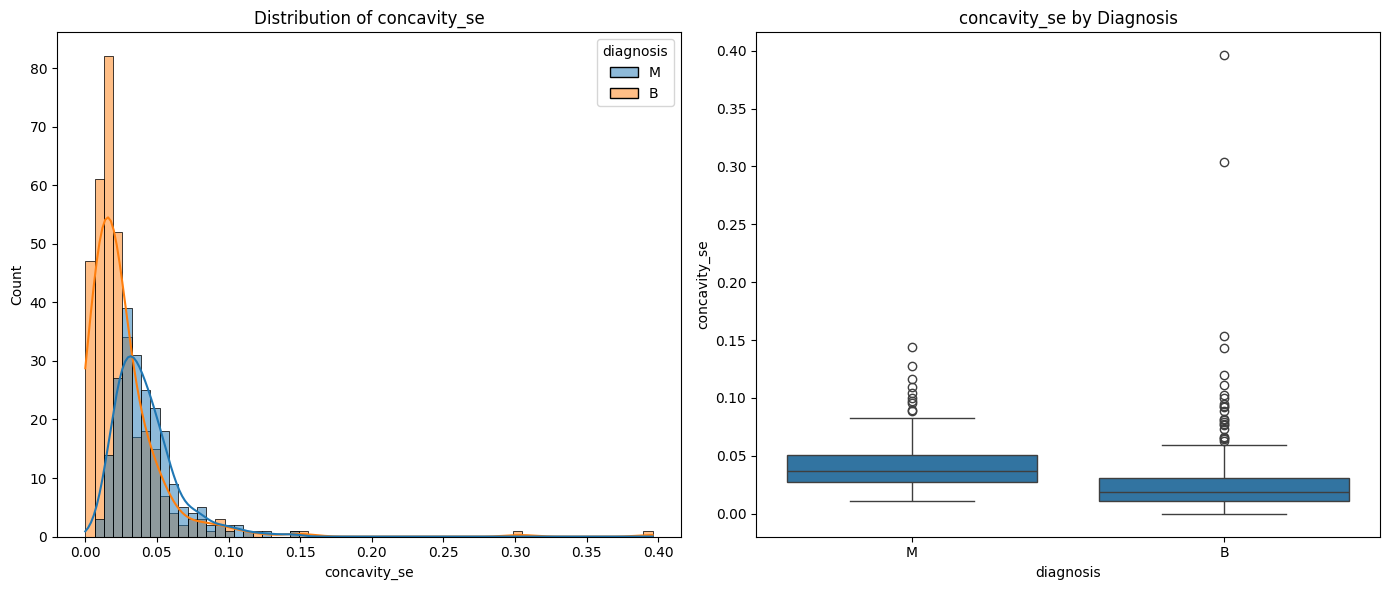

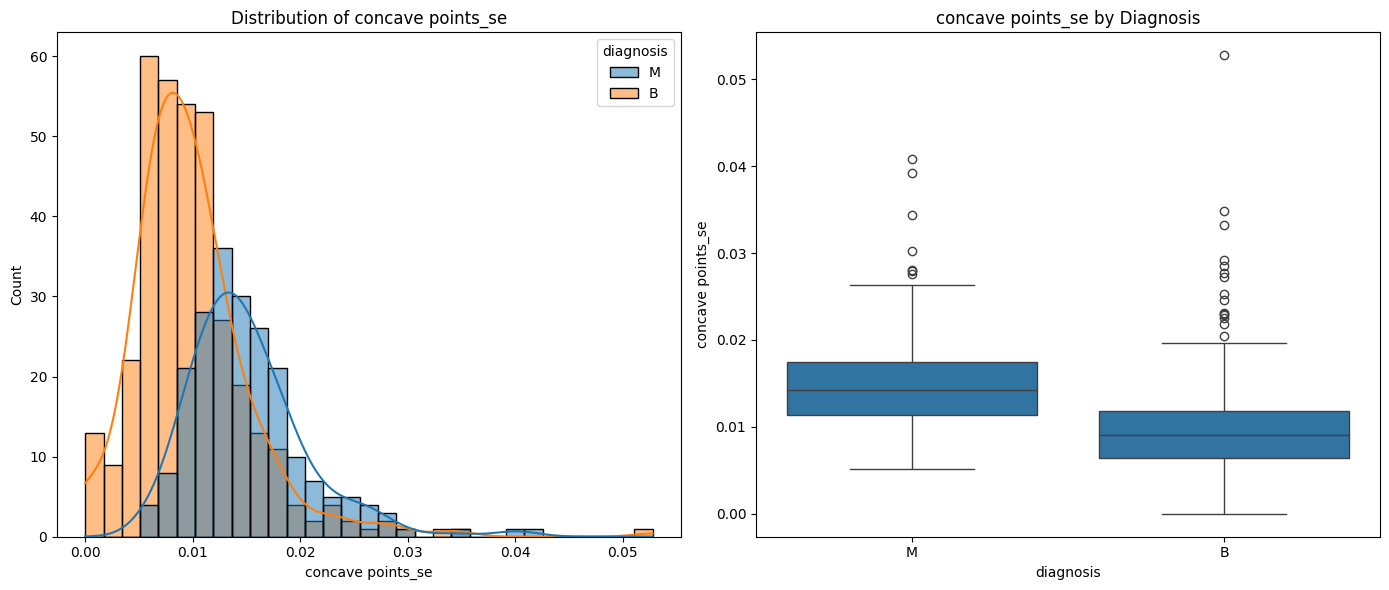

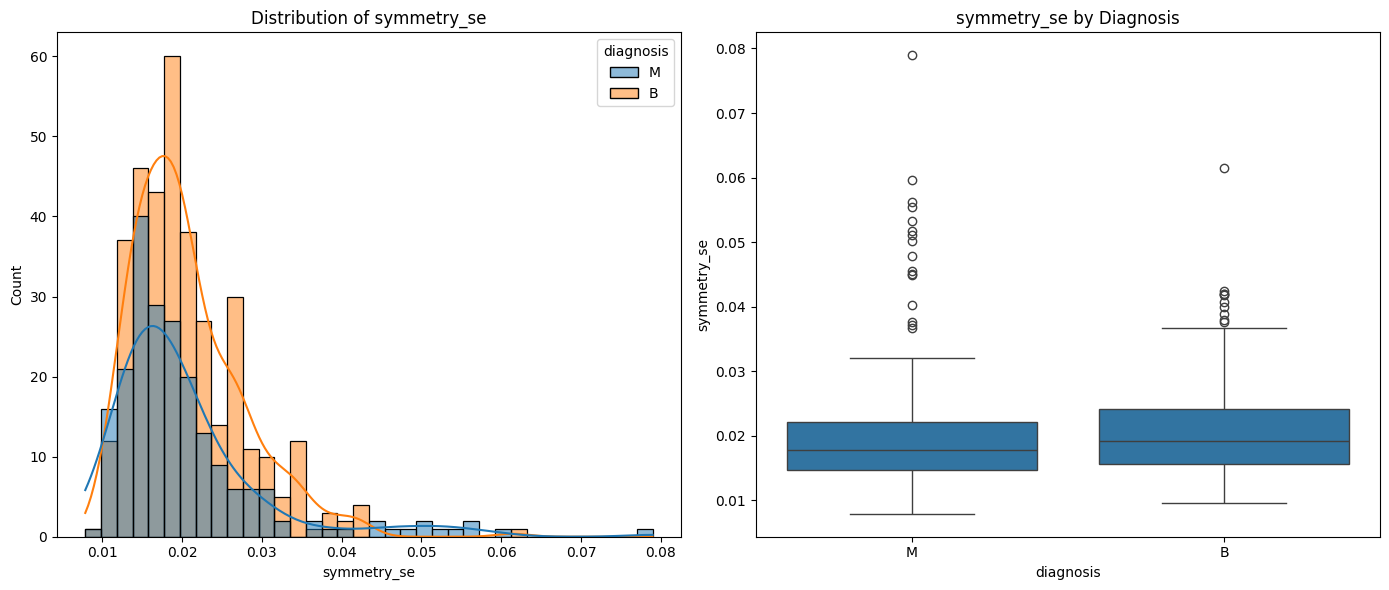

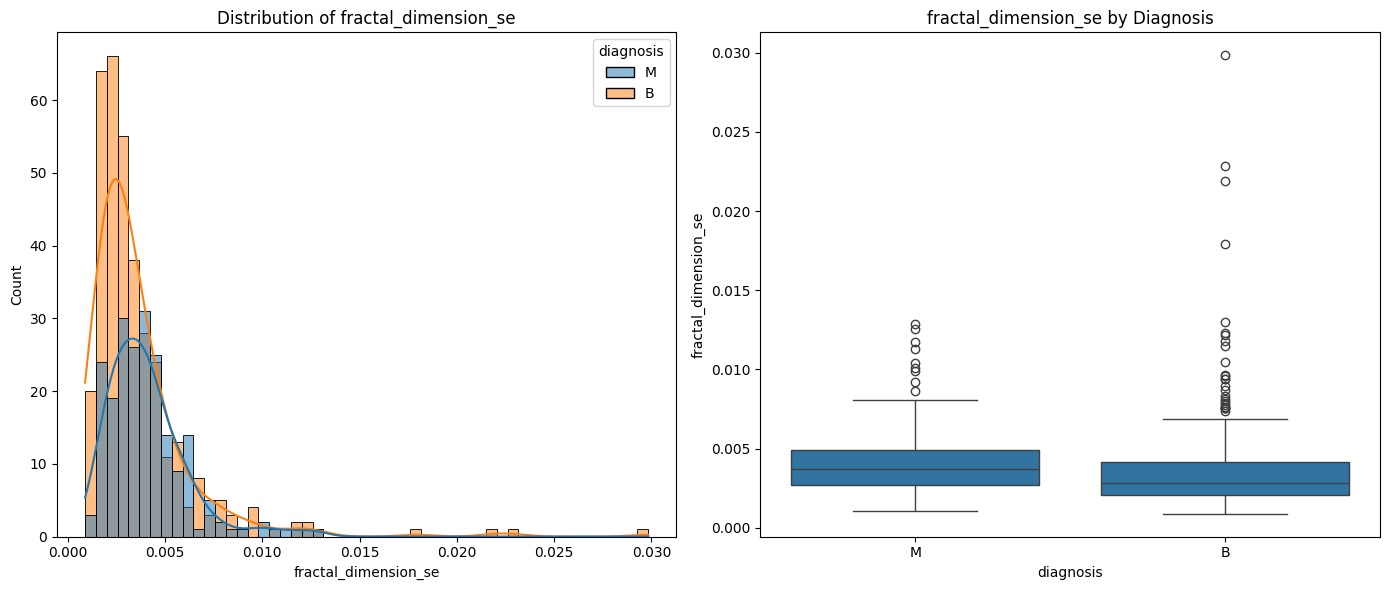

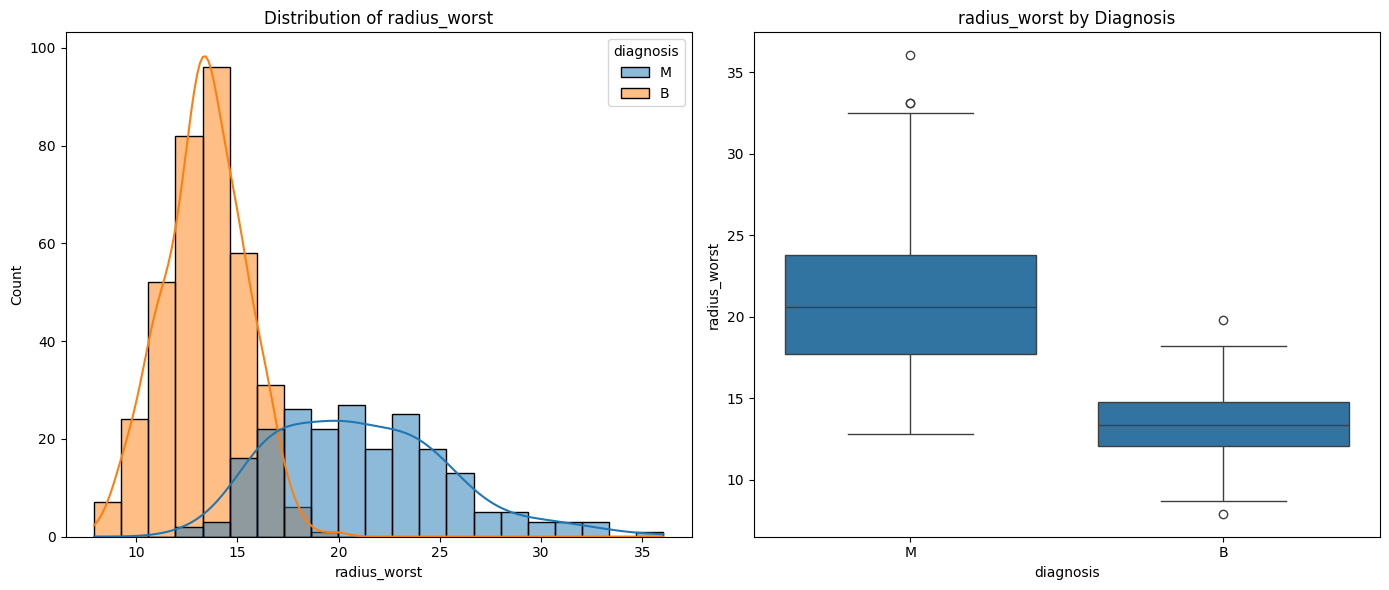

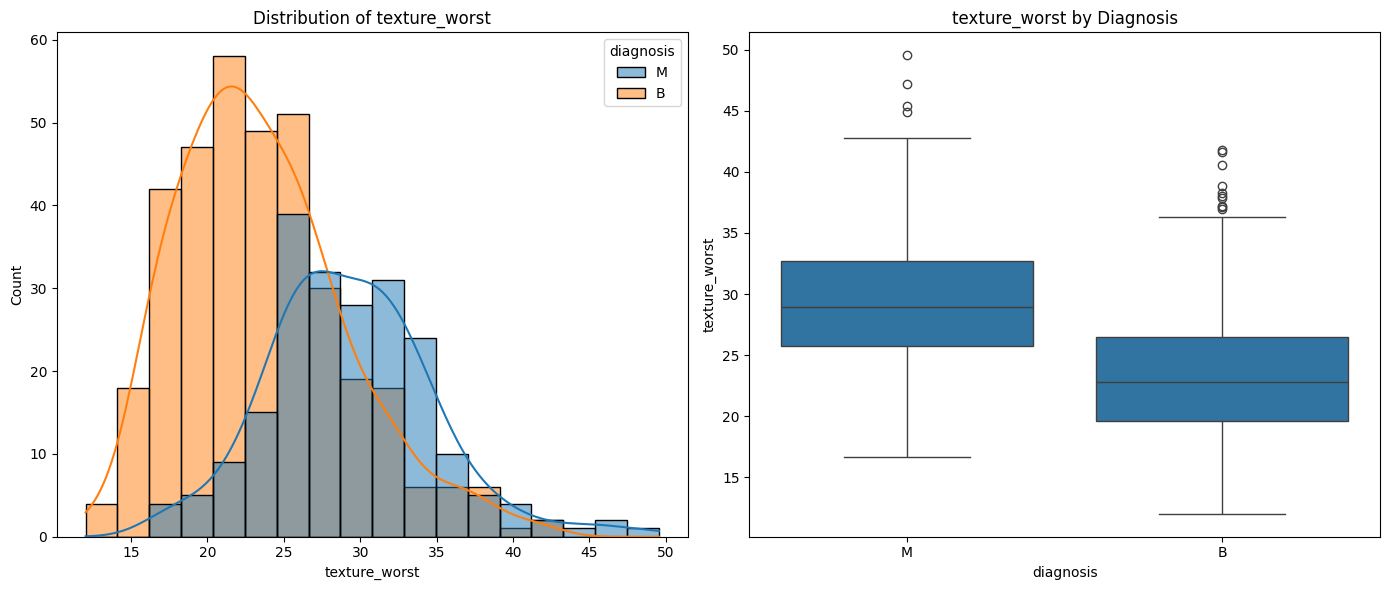

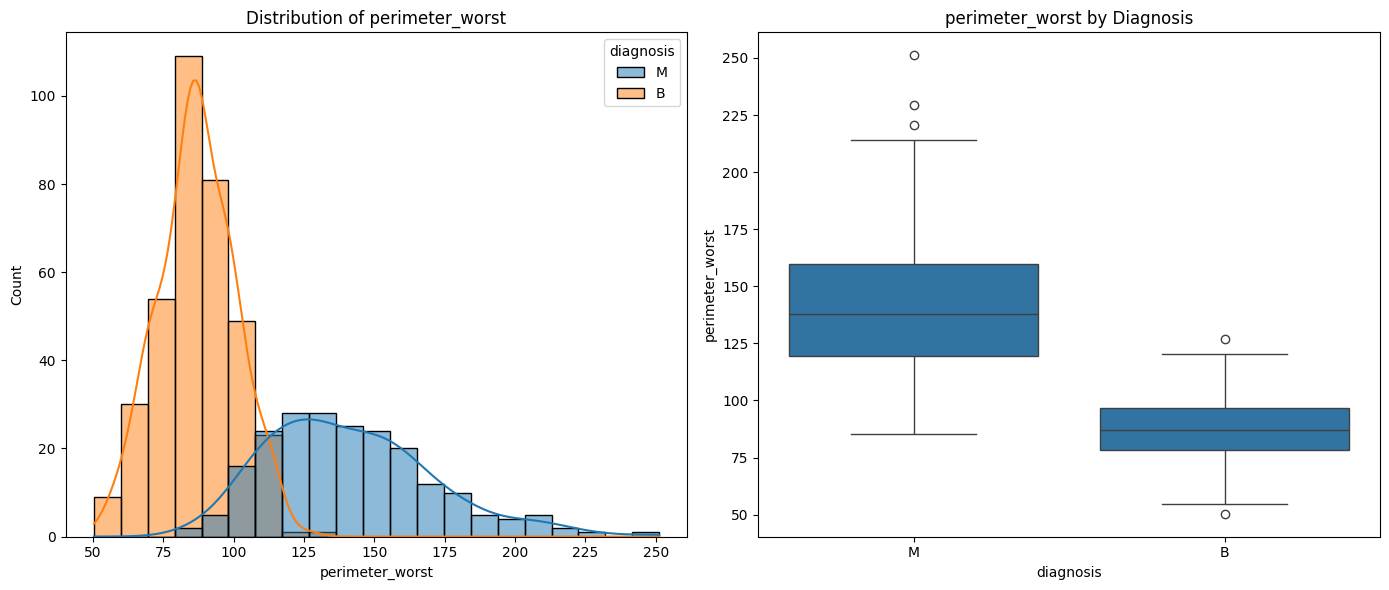

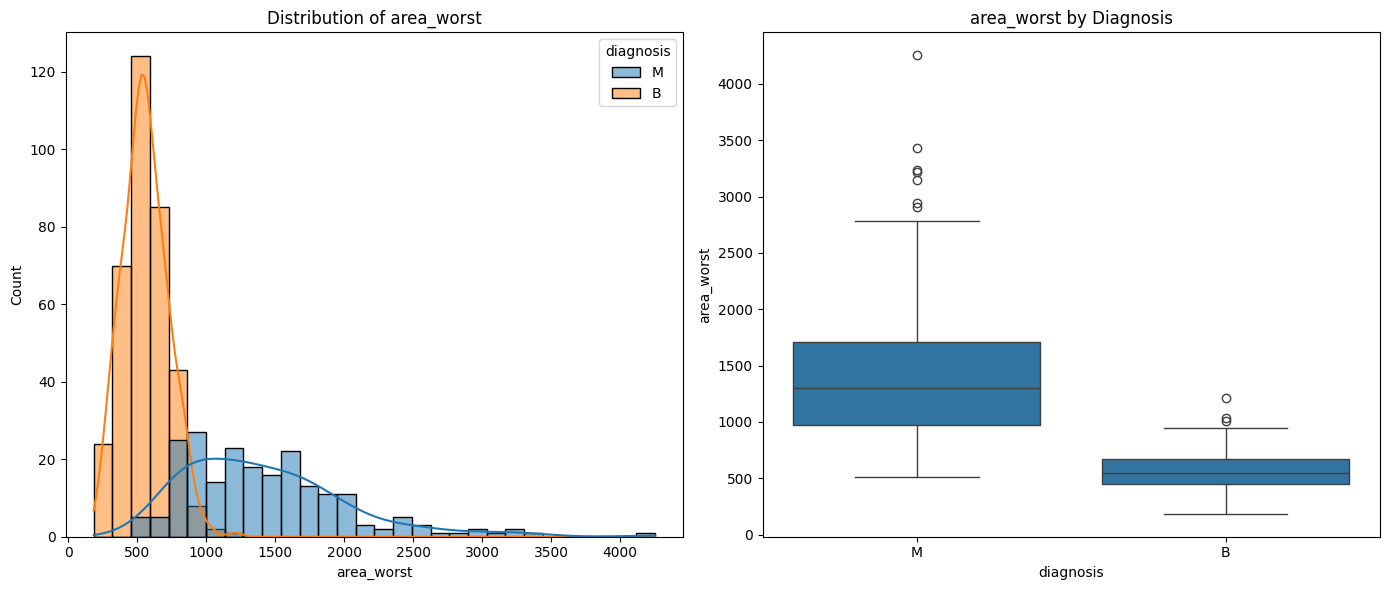

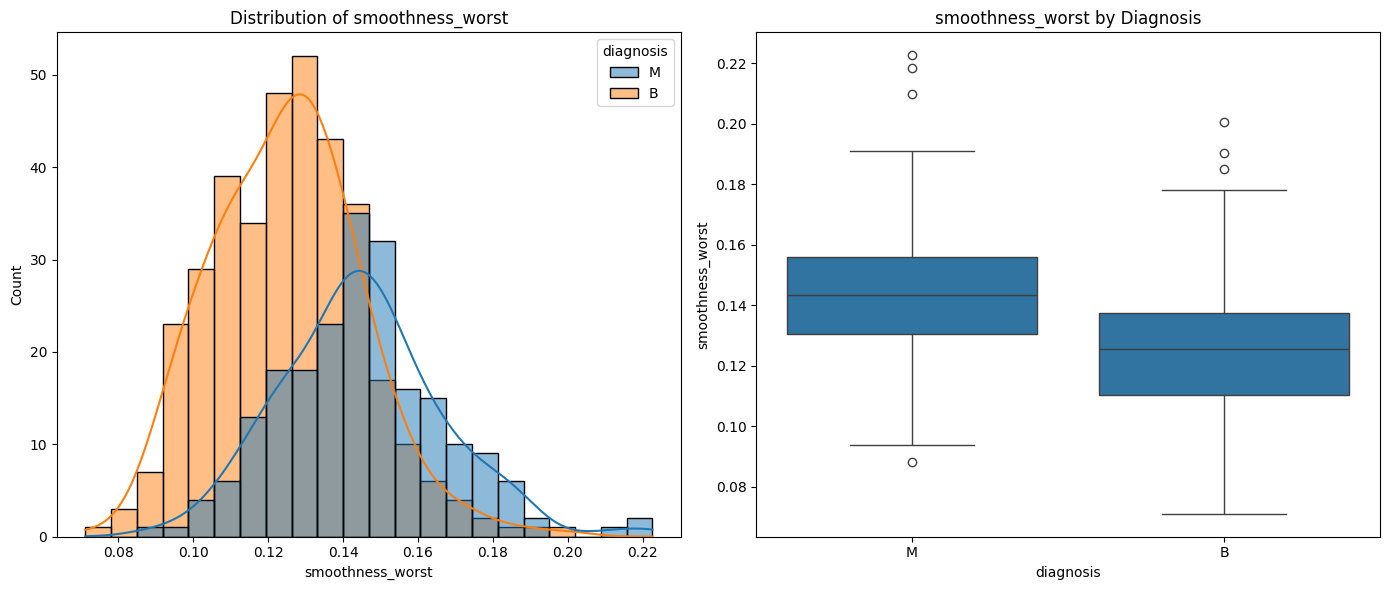

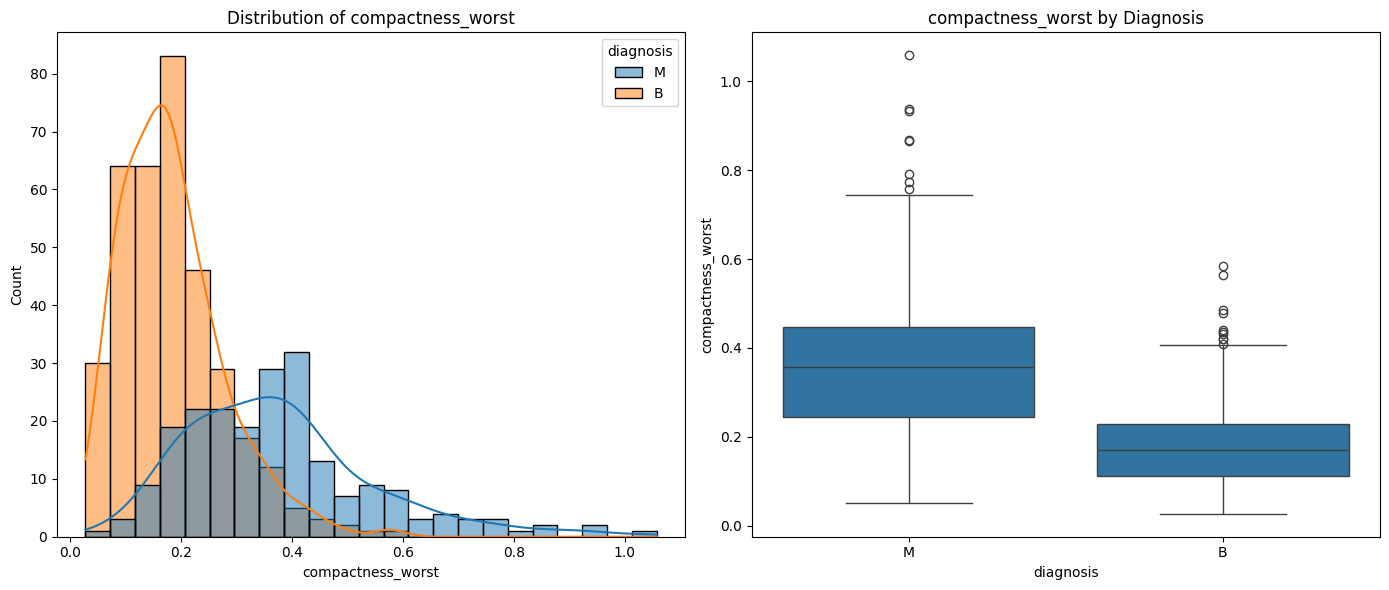

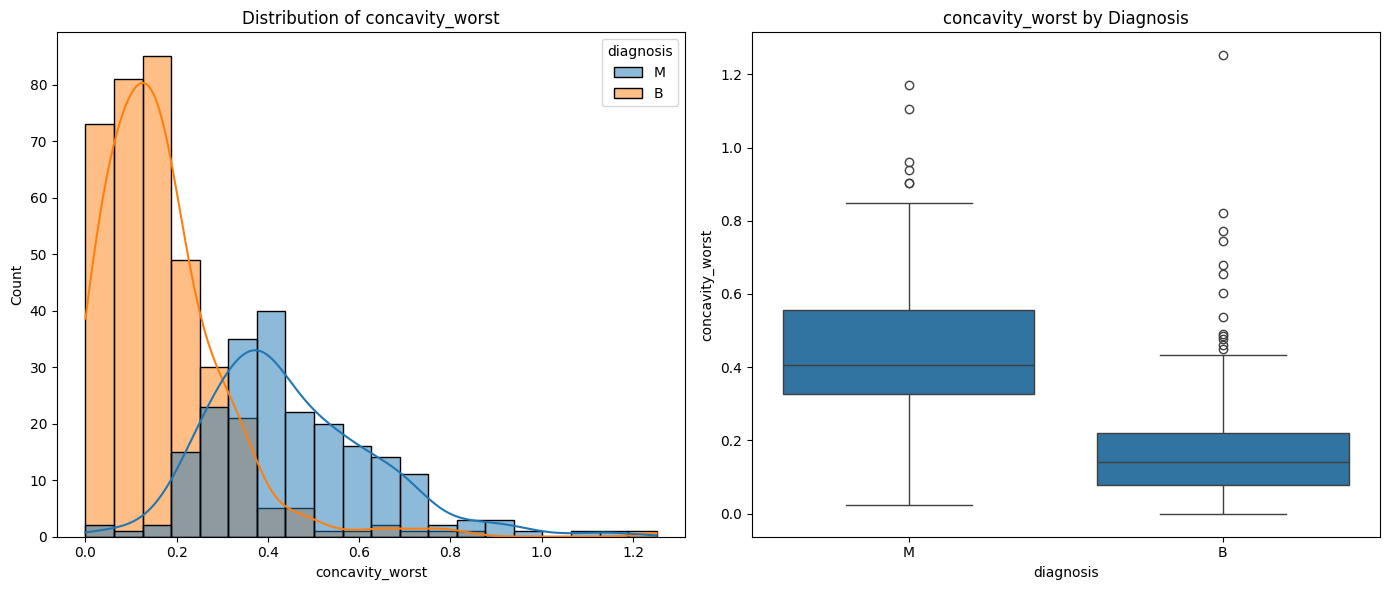

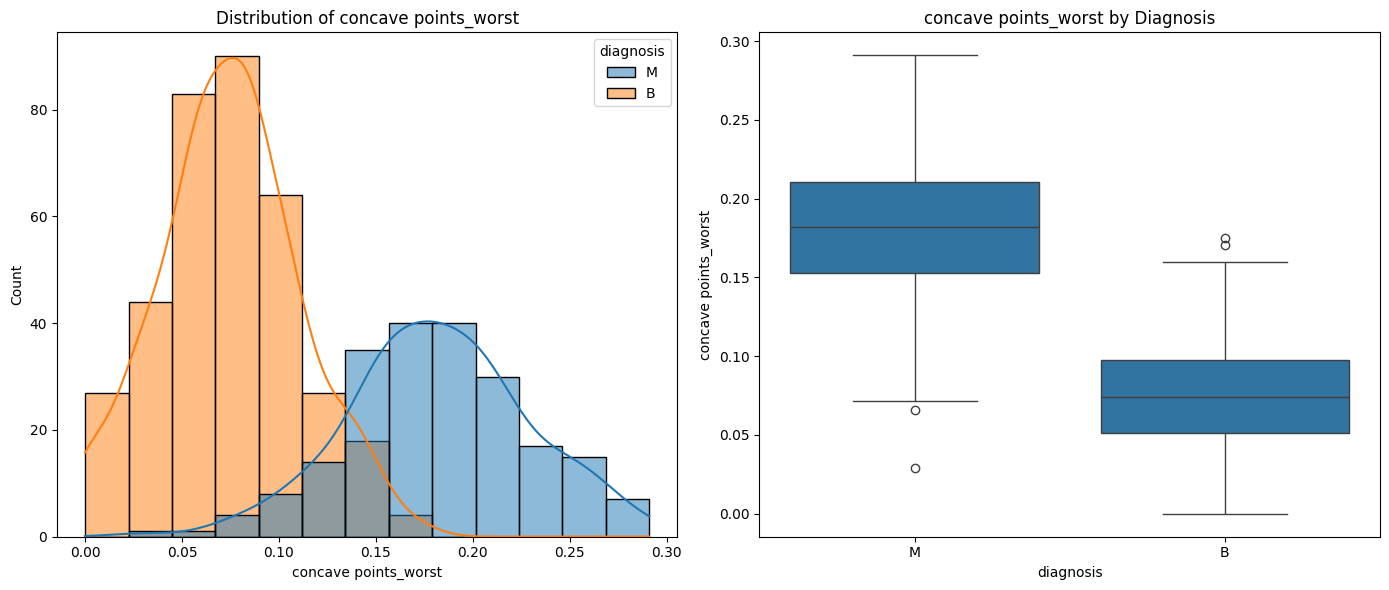

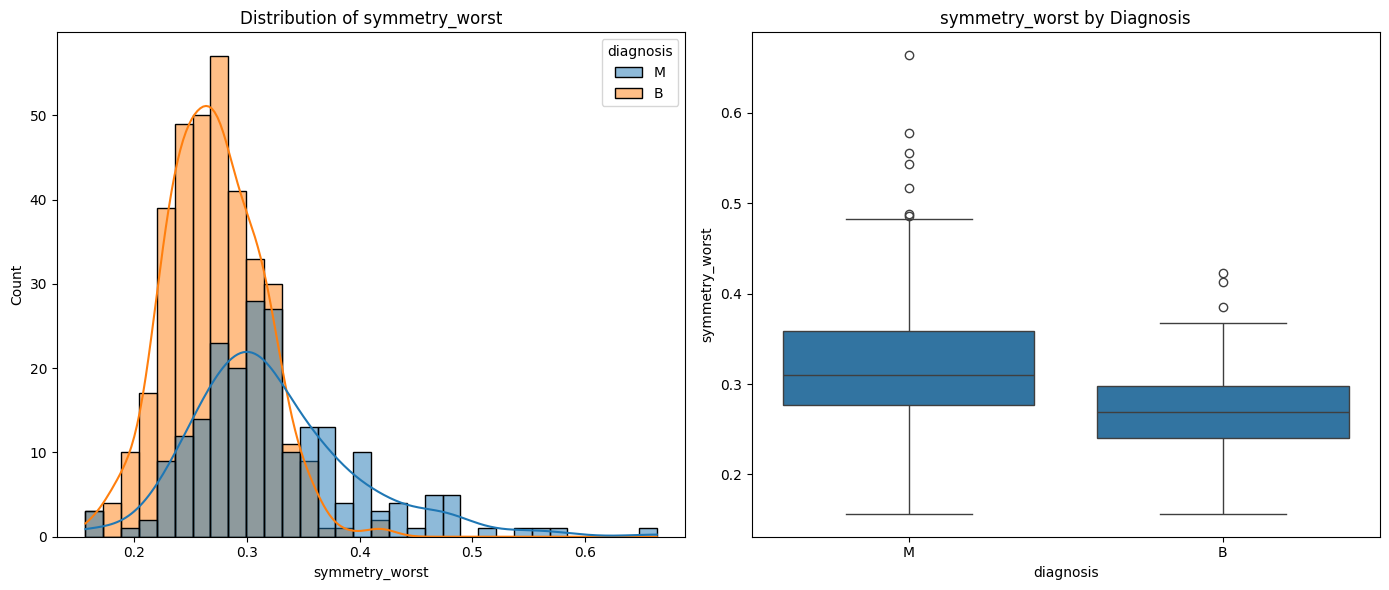

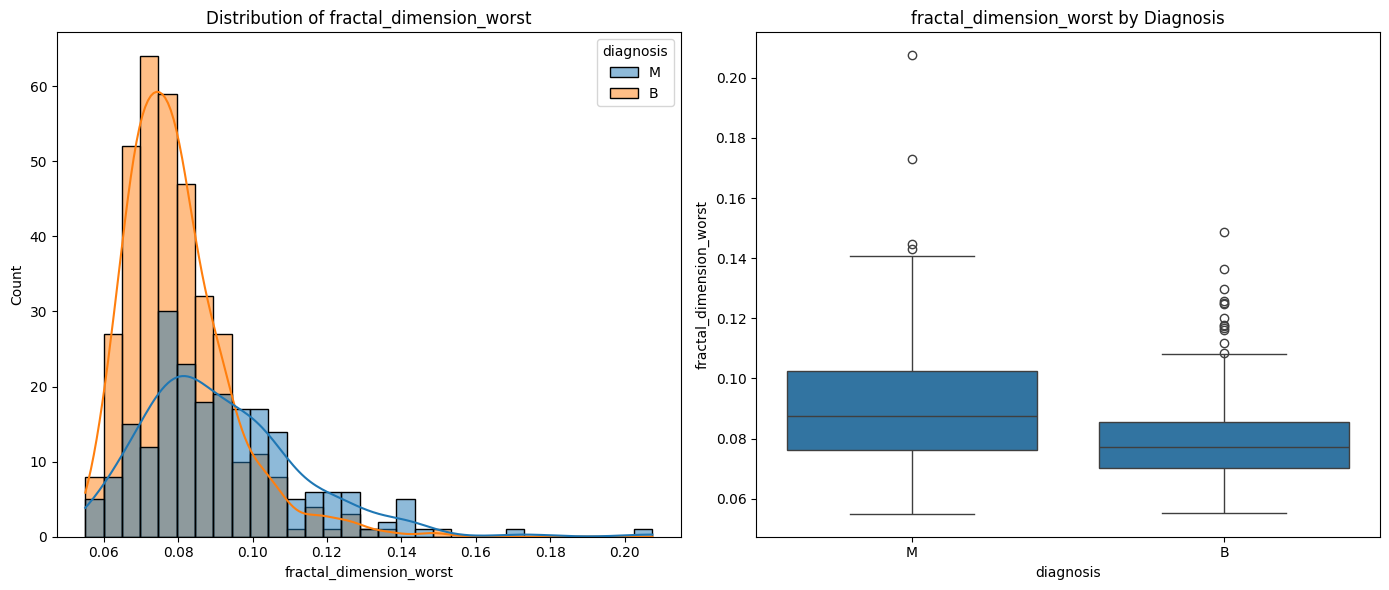

In [16]:
for nvar in numeric_vars:
    fig, axes = subplots(1, 2, figsize=(14, 6))
    
    sns.histplot(
        data=df,
        x=nvar,
        hue='diagnosis',
        kde=True,
        ax=axes[0]
    )
    axes[0].set_title(f'Distribution of {nvar}')
    
    sns.boxplot(
        data=df,
        x='diagnosis',
        y=nvar,
        ax=axes[1]
    )
    axes[1].set_title(f'{nvar} by Diagnosis')
    
    plt.tight_layout()
    plt.show()

Univariate analysis was conducted to examine the distributional properties of individual predictors and assess their clinical plausibility. Histograms and boxplots stratified by diagnosis were used to explore differences between benign and melignant cases. This step is particularly important in medical datasets, were extrem values may correspond to biologically meaningful pathological cases rather than measurement errors.

### Interpretation

#### Size-Related Features

For size-related variables such as radius, perimeter, and area, histogram plots generally show malignant cases to be right-skewed with heavier upper tails, particularly for mean and worst measurements. The degree of overlap between benign and malignant cases is relatively limited for these features, indicating strong separation. For standard error–based size features, greater overlap is observed, although the overall distributional patterns remain consistent.

Boxplots further reinforce these findings by showing substantially higher median values for malignant cases, along with greater variability and a higher concentration of extreme values. These results suggest that tumor size is an important discriminative factor and is likely to contribute strongly to classification performance.

#### Boundary Irregularity Features

Features related to boundary irregularity, including compactness, concavity, and concave points, display distributional patterns similar to those observed for size-related variables. Histogram plots indicate that malignant cases tend to be right-skewed with heavy upper tails and relatively limited overlap with benign cases. Boxplots show higher medians and increased variability for malignant tumors, reflecting greater structural irregularity.

The presence of extreme values in these variables is consistent with known biological characteristics of malignant tumors, which often exhibit irregular boundaries and invasive growth patterns. As a result, boundary irregularity features appear to provide meaningful discriminatory information for distinguishing between benign and malignant cases.

#### Texture-Related Features

Texture-related variables exhibit more heterogeneous distributional behavior compared to size and boundary-related features. In some cases, malignant distributions appear approximately normal, while in others they are right-skewed. Across most texture-related predictors, substantial overlap is observed between benign and malignant cases in both histogram and boxplot visualizations. This suggests that, when considered individually, texture features may have limited discriminative power and are likely to be more informative when combined with other predictors in multivariate models.

Overall, the exploratory analysis indicates that size and boundary-related features exhibit the strongest univariate separation between benign and malignant cases, while texture-related features show greater overlap and may contribute more effectively in combination with other predictors.

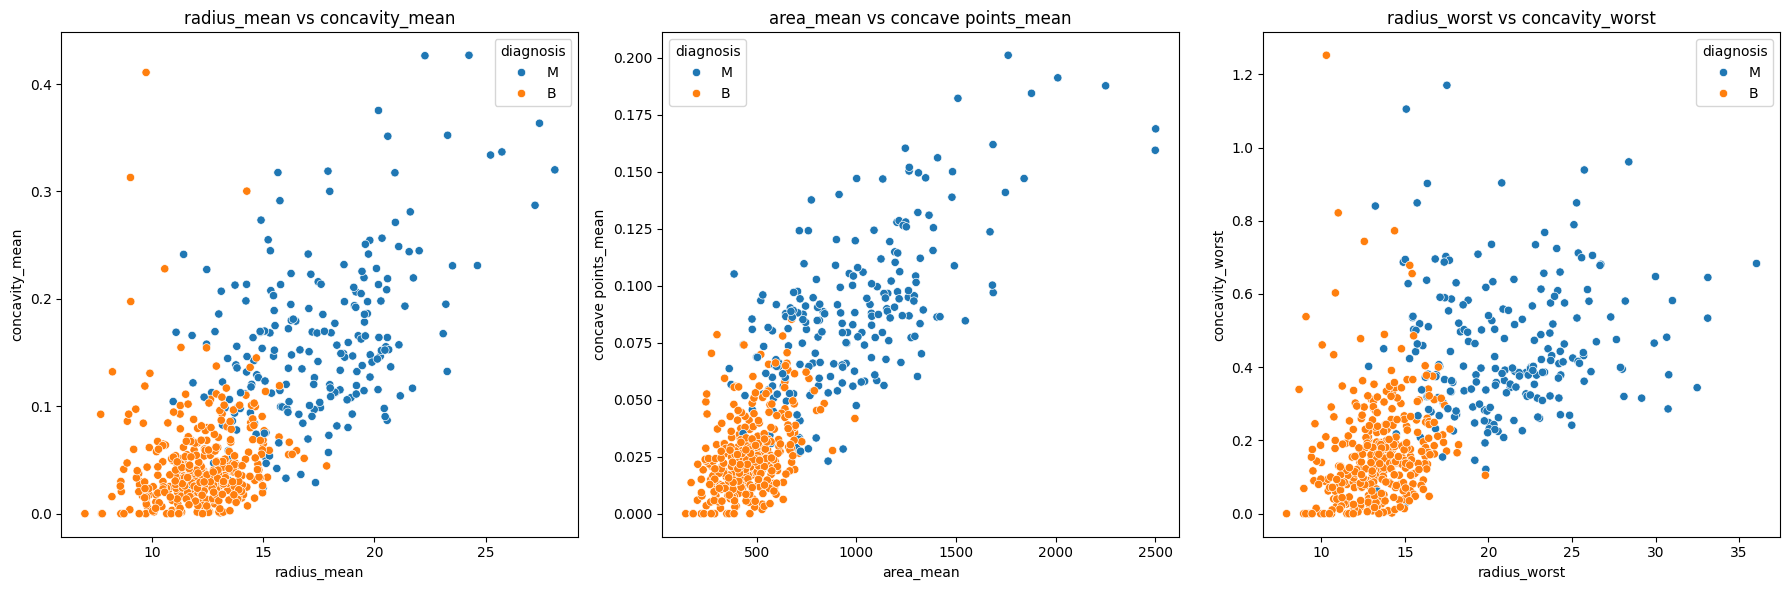

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pairs = [
    ('radius_mean', 'concavity_mean'),
    ('area_mean', 'concave points_mean'),
    ('radius_worst', 'concavity_worst')
]

for ax, (x_var, y_var) in zip(axes, pairs):
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        hue='diagnosis',
        ax=ax
    )
    ax.set_title(f'{x_var} vs {y_var}')

plt.tight_layout()
plt.show()

#### Interpretation

Selected scatter plots reveal partial separation between benign and malignant cases when size-related features are combined with boundary irregularity measures. Malignant tumors tend to occupy regions characterized by both larger size and increased structural irregularity, while benign cases are more concentrated in lower-value regions of these feature spaces. This pattern is consistent with known pathological characteristics of malignant tumors, which often grow more aggressively and exhibit irregular, invasive boundaries.

Although the separation is not perfect and some overlap remains, these visual patterns suggest that combining multiple predictors can enhance discriminatory power. This observation supports the use of multivariate classification models, which are capable of capturing joint relationships between tumor size and shape that are not evident when predictors are examined individually.

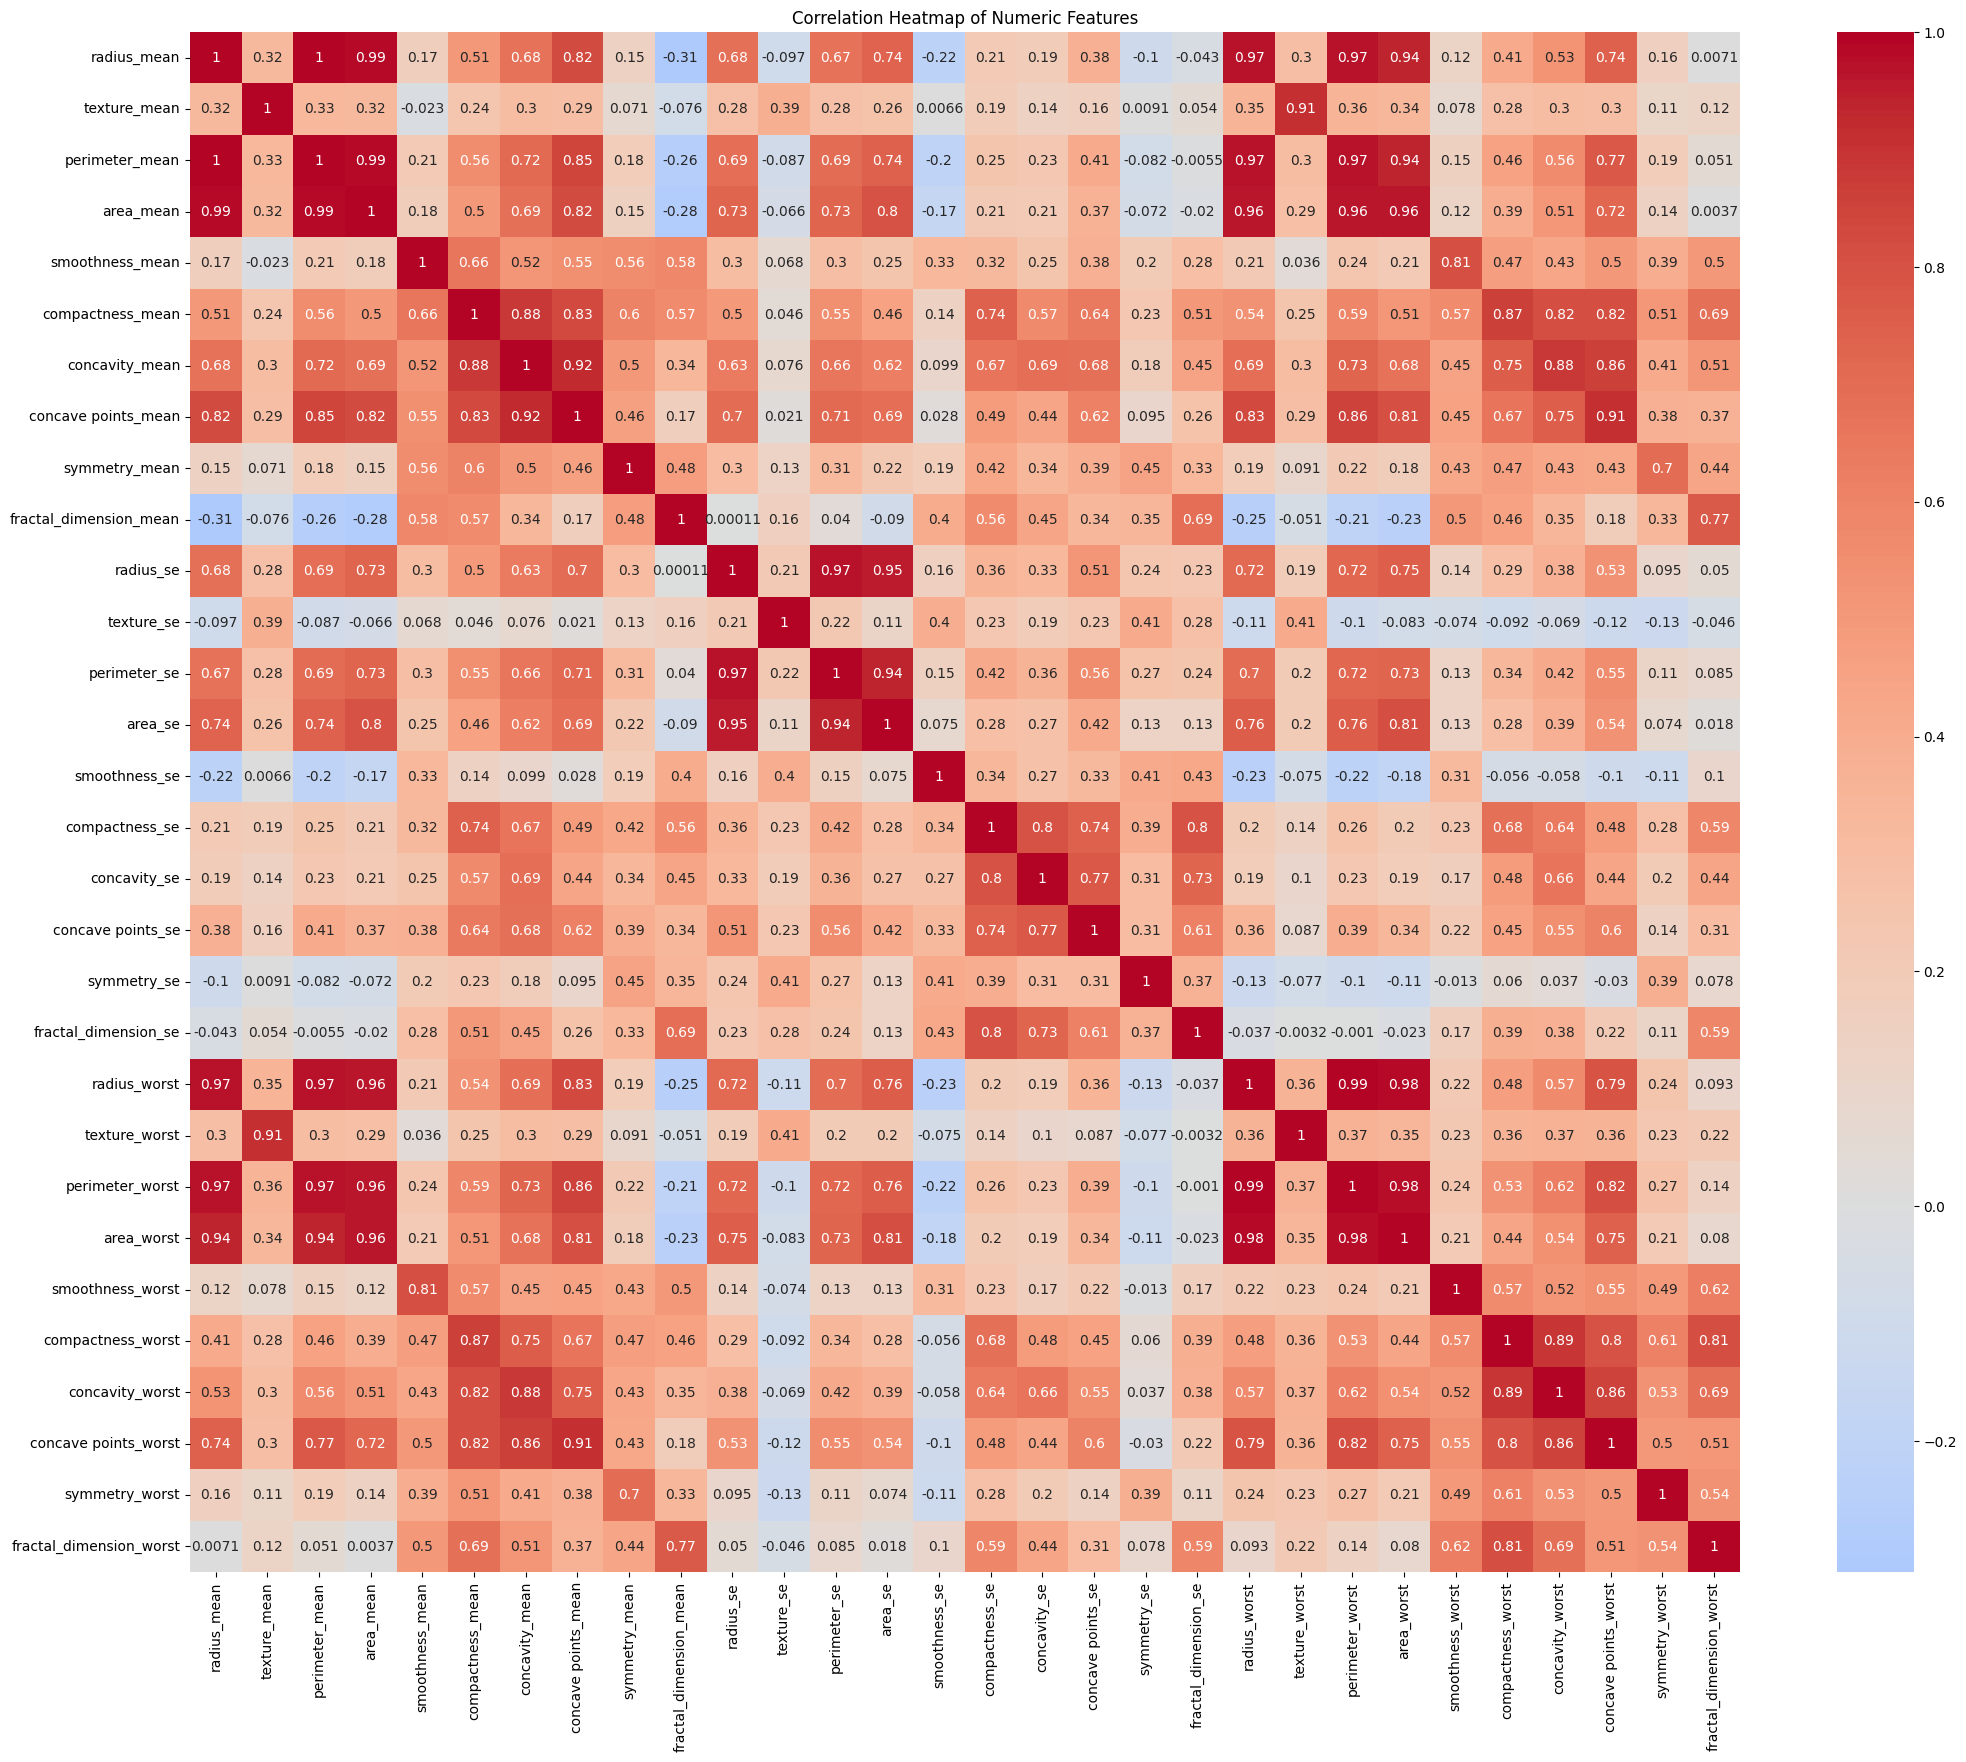

In [28]:
plt.figure(figsize=(25, 20))
sns.heatmap(
    df[numeric_vars].corr(),
    cmap='coolwarm',
    center=0,
    annot=True
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### Correlation Analysis

The correlation heatmap reveals clear clustering among several groups of predictors. Strong positive correlations are observed among size-related features such as radius, perimeter, and area across their mean, standard error, and worst measurements. This reflects both the geometric relationships between these variables and their shared biological interpretation as indicators of tumor size.

A second cluster of highly correlated variables is observed among boundary irregularity features, including concavity, concave points, and compactness. These correlations are consistent with pathological characteristics of malignant tumors, which often exhibit irregular and invasive boundaries.

The presence of strong correlations indicates potential multicollinearity among predictors, which may affect the stability and interpretability of linear models. However, these correlated structures also suggest that combinations of features may enhance predictive performance, motivating the use of multivariate classification methods.

## Data Preparation

The goal of the data preparation phase is to transform the raw breast cancer dataset into a clean, consistent, and well-structured format suitable for classification analysis. This step is critical in medical machine learning, as preprocessing decisions directly influence model stability, interpretability, and predictive performance. Particular attention is given to preserving clinically meaningful information, handling feature scale differences, and ensuring that the prepared data supports reliable evaluation through resampling and cross-validation.

In [31]:
new_df = df.drop(columns=['id', 'Unnamed: 32'])
new_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
df_model = new_df.copy()

In [33]:
df_model['diagnosis'] = df_model['diagnosis'].map({'B': 0, 'M': 1})

In [34]:
df_model

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
y = df_model['diagnosis']
X = df_model.drop('diagnosis', axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)

In [57]:
X_test_scaled = scaler.transform(X_test)